# Assignment Week 1 – Data Preparation on UCI Heart Disease

This notebook performs exploratory data analysis (EDA), handles outliers, imputes missing values, and prepares the dataset for downstream ML tasks.
Data files used:
- `heart.disease.data.csv` (raw data)
- `Attributes.csv` (column descriptions)

In [1]:

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display settings
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 120)

RAW_PATH = "/mnt/data/heart.disease.data.csv"
ATTR_PATH = "/mnt/data/Attributes.csv"


In [2]:

# Load data
df = pd.read_csv(RAW_PATH)
attrs = pd.read_csv(ATTR_PATH)

print("Shape:", df.shape)
display(df.head())
display(attrs.head(20))


Shape: (282, 16)


,age,sex,cp,trestbps,chol,cigs,years,fbs,dm,famhist,restecg,thalach,exang,thal,slope,num
0,29,1,2,130,204,2,6,0,1,0,2,202,0,3,1,0
1,34,1,1,118,182,20,6,0,-9,0,2,174,0,3,1,0
2,34,0,2,118,210,10,15,0,-9,1,0,192,0,3,1,0
3,35,0,4,138,183,0,0,0,-9,1,0,182,0,3,1,0
4,35,1,4,120,198,0,0,0,-9,0,0,130,1,7,2,1


,Variable Name,Complete attribute documentation:
0,age,age in years
1,sex,(1 = male; 0 = female)
2,cp,chest pain type -- Value 1: typical angina -- ...
3,trestbps,resting blood pressure (in mm Hg on admission ...
4,chol,serum cholestoral in mg/dl
5,cigs,(cigarettes per day)
6,years,(number of years as a smoker)
7,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
8,dm,(1 = history of diabetes; 0 = no such history)
9,famhist,family history of coronary artery disease (1 =...


,dtype,n_missing,pct_missing,n_unique
age,int64,0,0.0,41
chol,int64,0,0.0,145
cigs,int64,0,0.0,23
cp,int64,0,0.0,4
dm,int64,0,0.0,2
exang,int64,0,0.0,2
famhist,int64,0,0.0,2
fbs,int64,0,0.0,2
num,int64,0,0.0,5
restecg,int64,0,0.0,3


,count,mean,std,min,25%,50%,75%,max
age,282.0,54.411348,9.053083,29.0,48.00,55.0,61.00,77.0
sex,282.0,0.677305,0.468338,0.0,0.00,1.0,1.00,1.0
cp,282.0,3.163121,0.955405,1.0,3.00,3.0,4.00,4.0
trestbps,282.0,131.563830,17.757496,94.0,120.00,130.0,140.00,200.0
chol,282.0,249.092199,51.217546,126.0,213.00,244.0,277.00,564.0
cigs,282.0,16.460993,19.580300,-9.0,0.00,10.0,30.00,99.0
years,282.0,14.829787,15.564563,-9.0,0.00,15.0,30.00,54.0
fbs,282.0,0.148936,0.356658,0.0,0.00,0.0,0.00,1.0
dm,282.0,-8.184397,2.741802,-9.0,-9.00,-9.0,-9.00,1.0
famhist,282.0,0.620567,0.486108,0.0,0.00,1.0,1.00,1.0


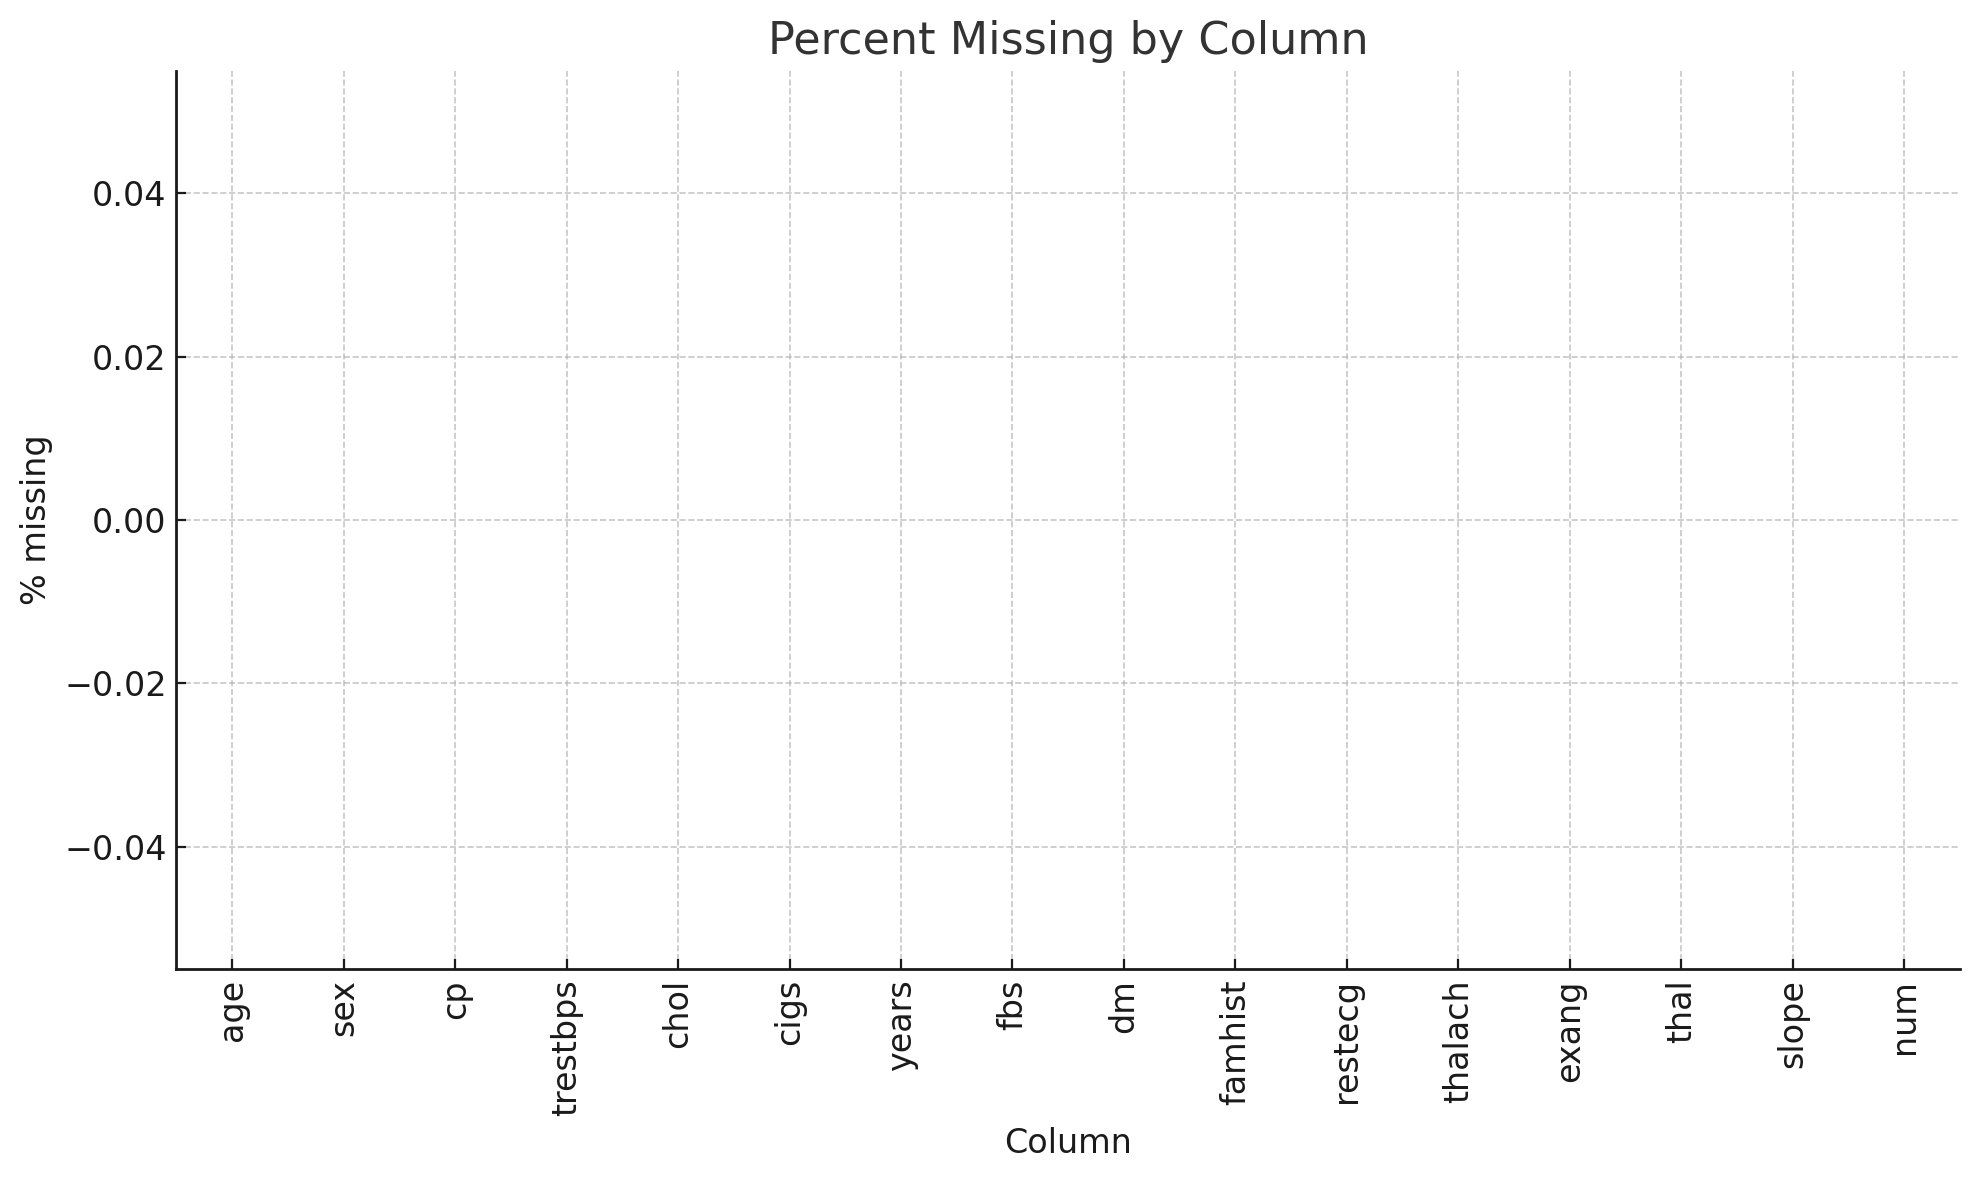

In [3]:

# Basic structure & missingness
summary = pd.DataFrame({
    "dtype": df.dtypes.astype(str),
    "n_missing": df.isna().sum(),
    "pct_missing": (df.isna().mean()*100).round(2),
    "n_unique": df.nunique()
}).sort_index()
display(summary)

display(df.describe(include='all').transpose())

# Visualize missingness as a bar chart
miss = (df.isna().mean()*100).sort_values(ascending=False)
plt.figure()
miss.plot(kind='bar')
plt.title("Percent Missing by Column")
plt.ylabel("% missing")
plt.xlabel("Column")
plt.tight_layout()
plt.show()


In [4]:

# Identify likely categorical vs numeric
# Based on known UCI heart dataset codes
categorical_like = ['sex','cp','fbs','dm','famhist','restecg','exang','thal','slope','num']
categorical_like = [c for c in categorical_like if c in df.columns]

numeric_cols = [c for c in df.columns if df[c].dtype != 'O' and c not in categorical_like]
print("Numeric columns:", numeric_cols)
print("Categorical-like columns:", categorical_like)

# Quick distributions for categoricals
for c in categorical_like:
    vc = df[c].value_counts(dropna=False).sort_index()
    print(f"\nValue counts for {c}:")
    print(vc)


Numeric columns: ['age', 'trestbps', 'chol', 'cigs', 'years', 'thalach']
Categorical-like columns: ['sex', 'cp', 'fbs', 'dm', 'famhist', 'restecg', 'exang', 'thal', 'slope', 'num']

Value counts for sex:
0     91
1    191
Name: sex, dtype: int64

Value counts for cp:
1     22
2     43
3     84
4    133
Name: cp, dtype: int64

Value counts for fbs:
0    240
1     42
Name: fbs, dtype: int64

Value counts for dm:
-9    259
 1     23
Name: dm, dtype: int64

Value counts for famhist:
0    107
1    175
Name: famhist, dtype: int64

Value counts for restecg:
0    138
1      2
2    142
Name: restecg, dtype: int64

Value counts for exang:
0    190
1     92
Name: exang, dtype: int64

Value counts for thal:
-9      2
 3    159
 6     14
 7    107
Name: thal, dtype: int64

Value counts for slope:
1    133
2    129
3     20
Name: slope, dtype: int64

Value counts for num:
0    157
1     50
2     31
3     32
4     12
Name: num, dtype: int64


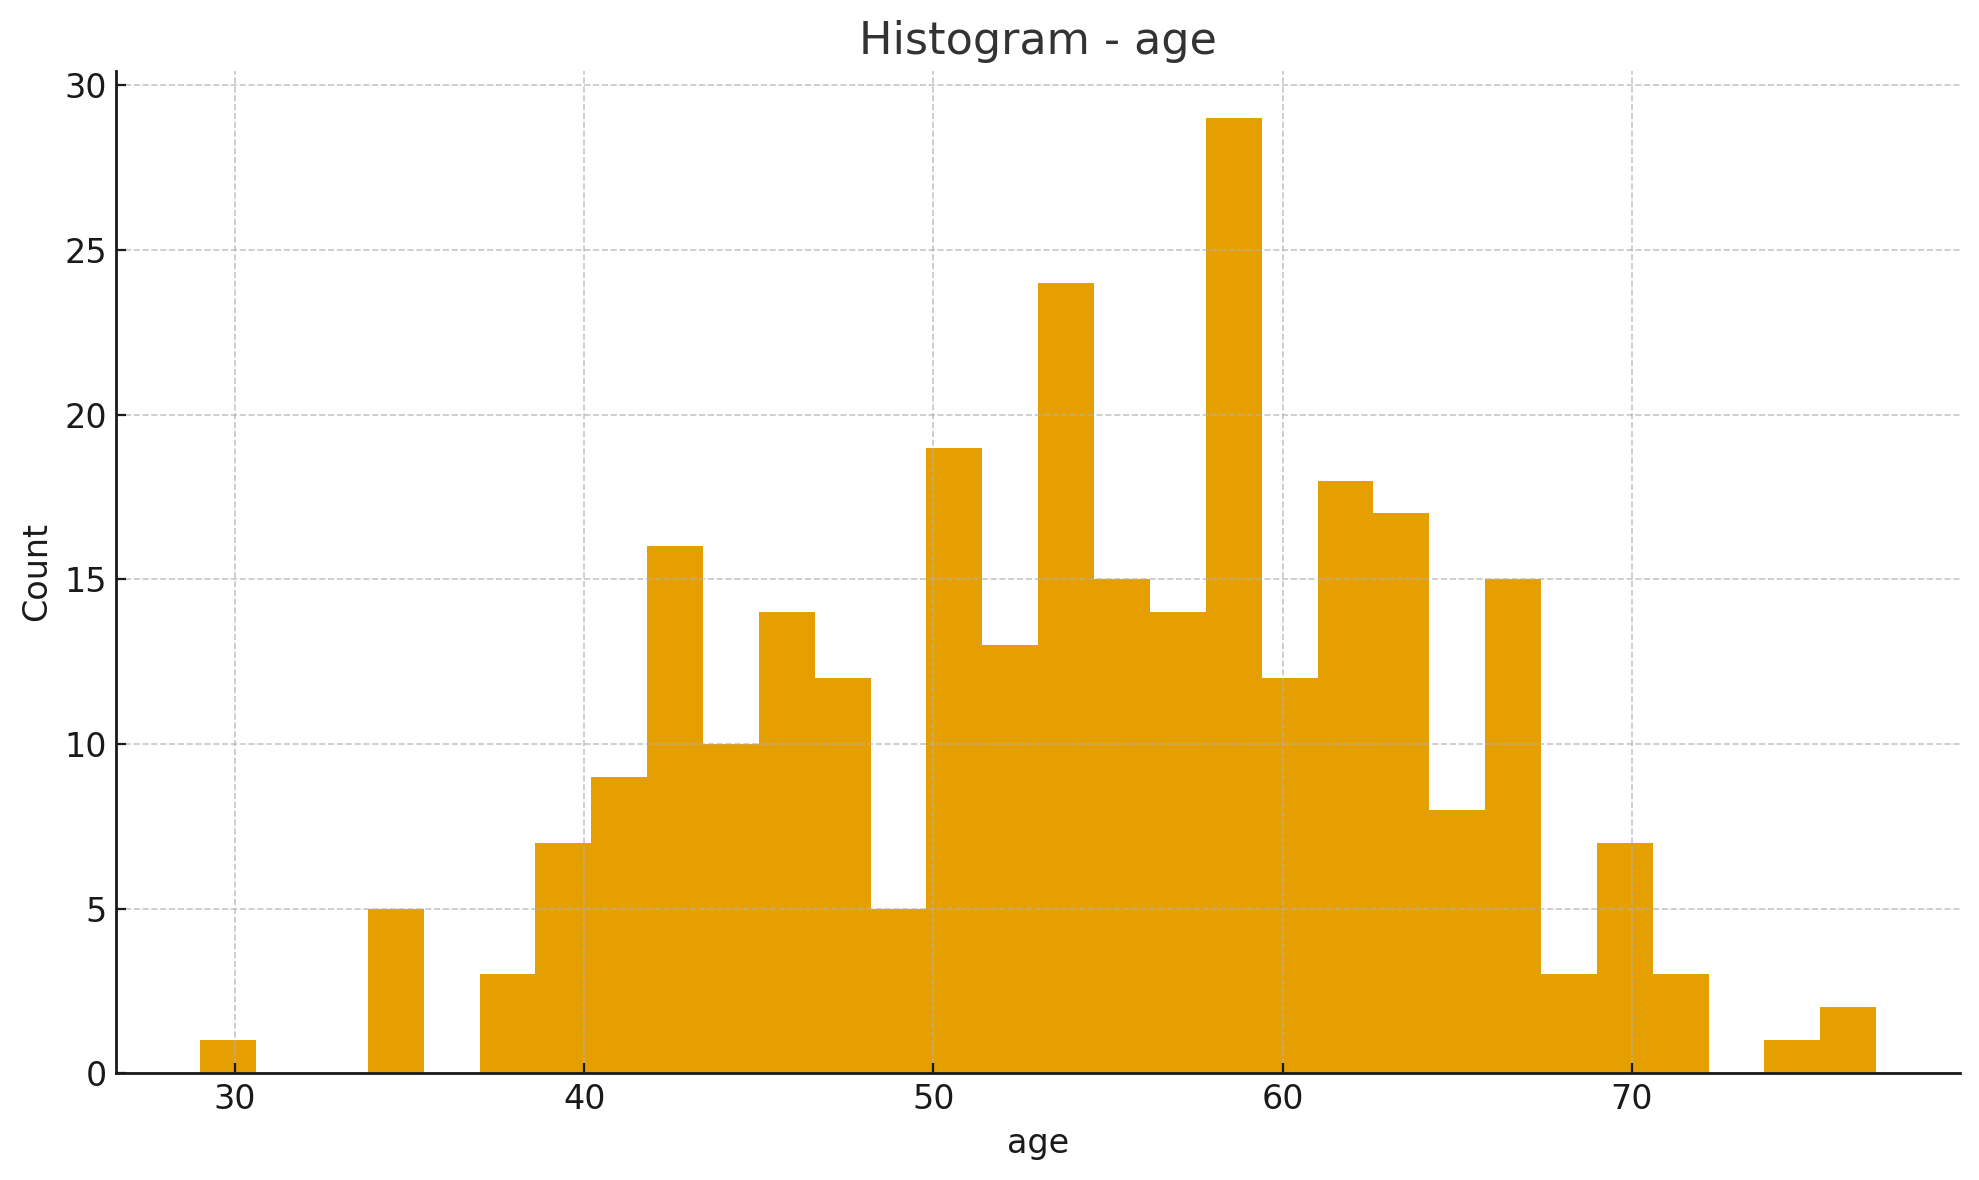

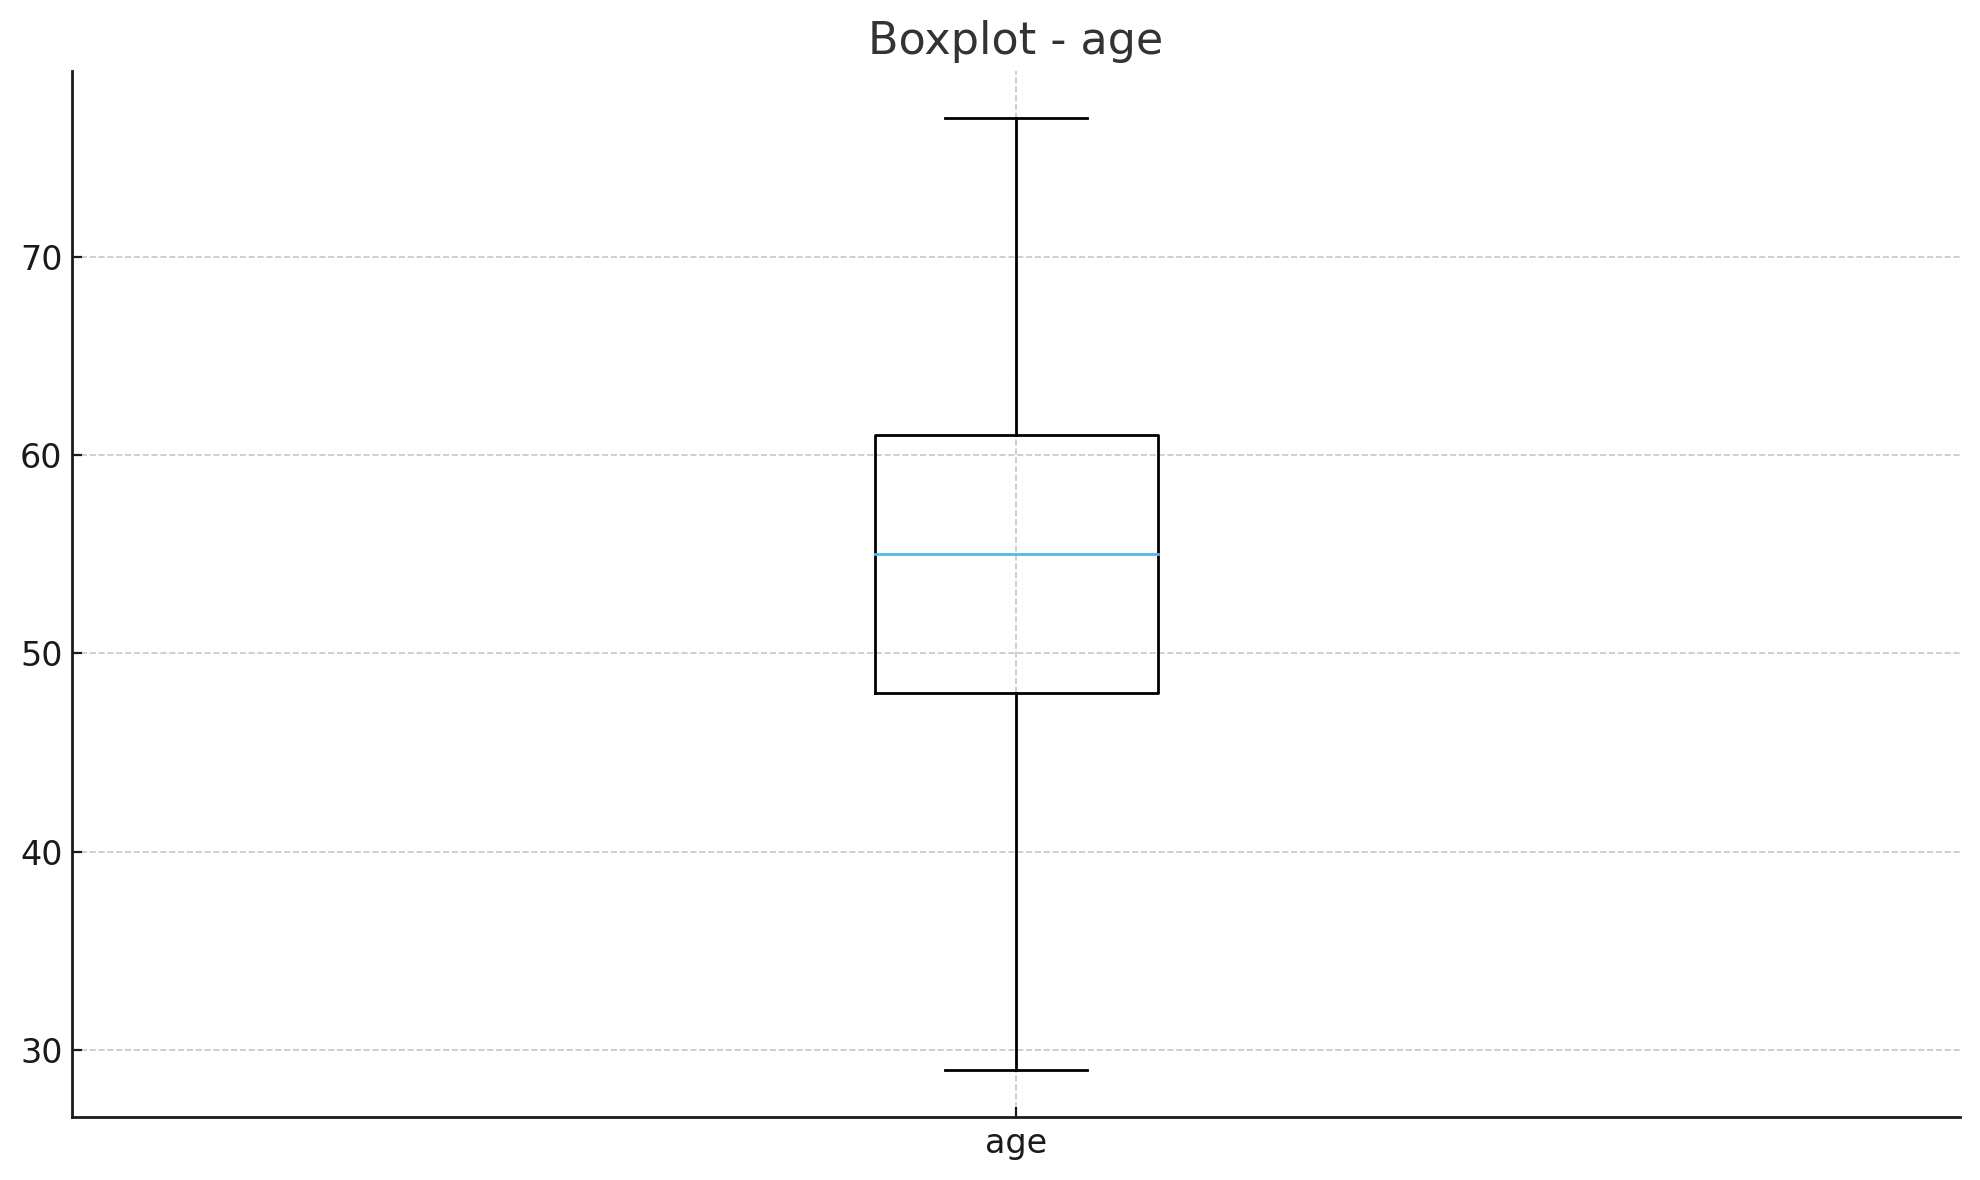

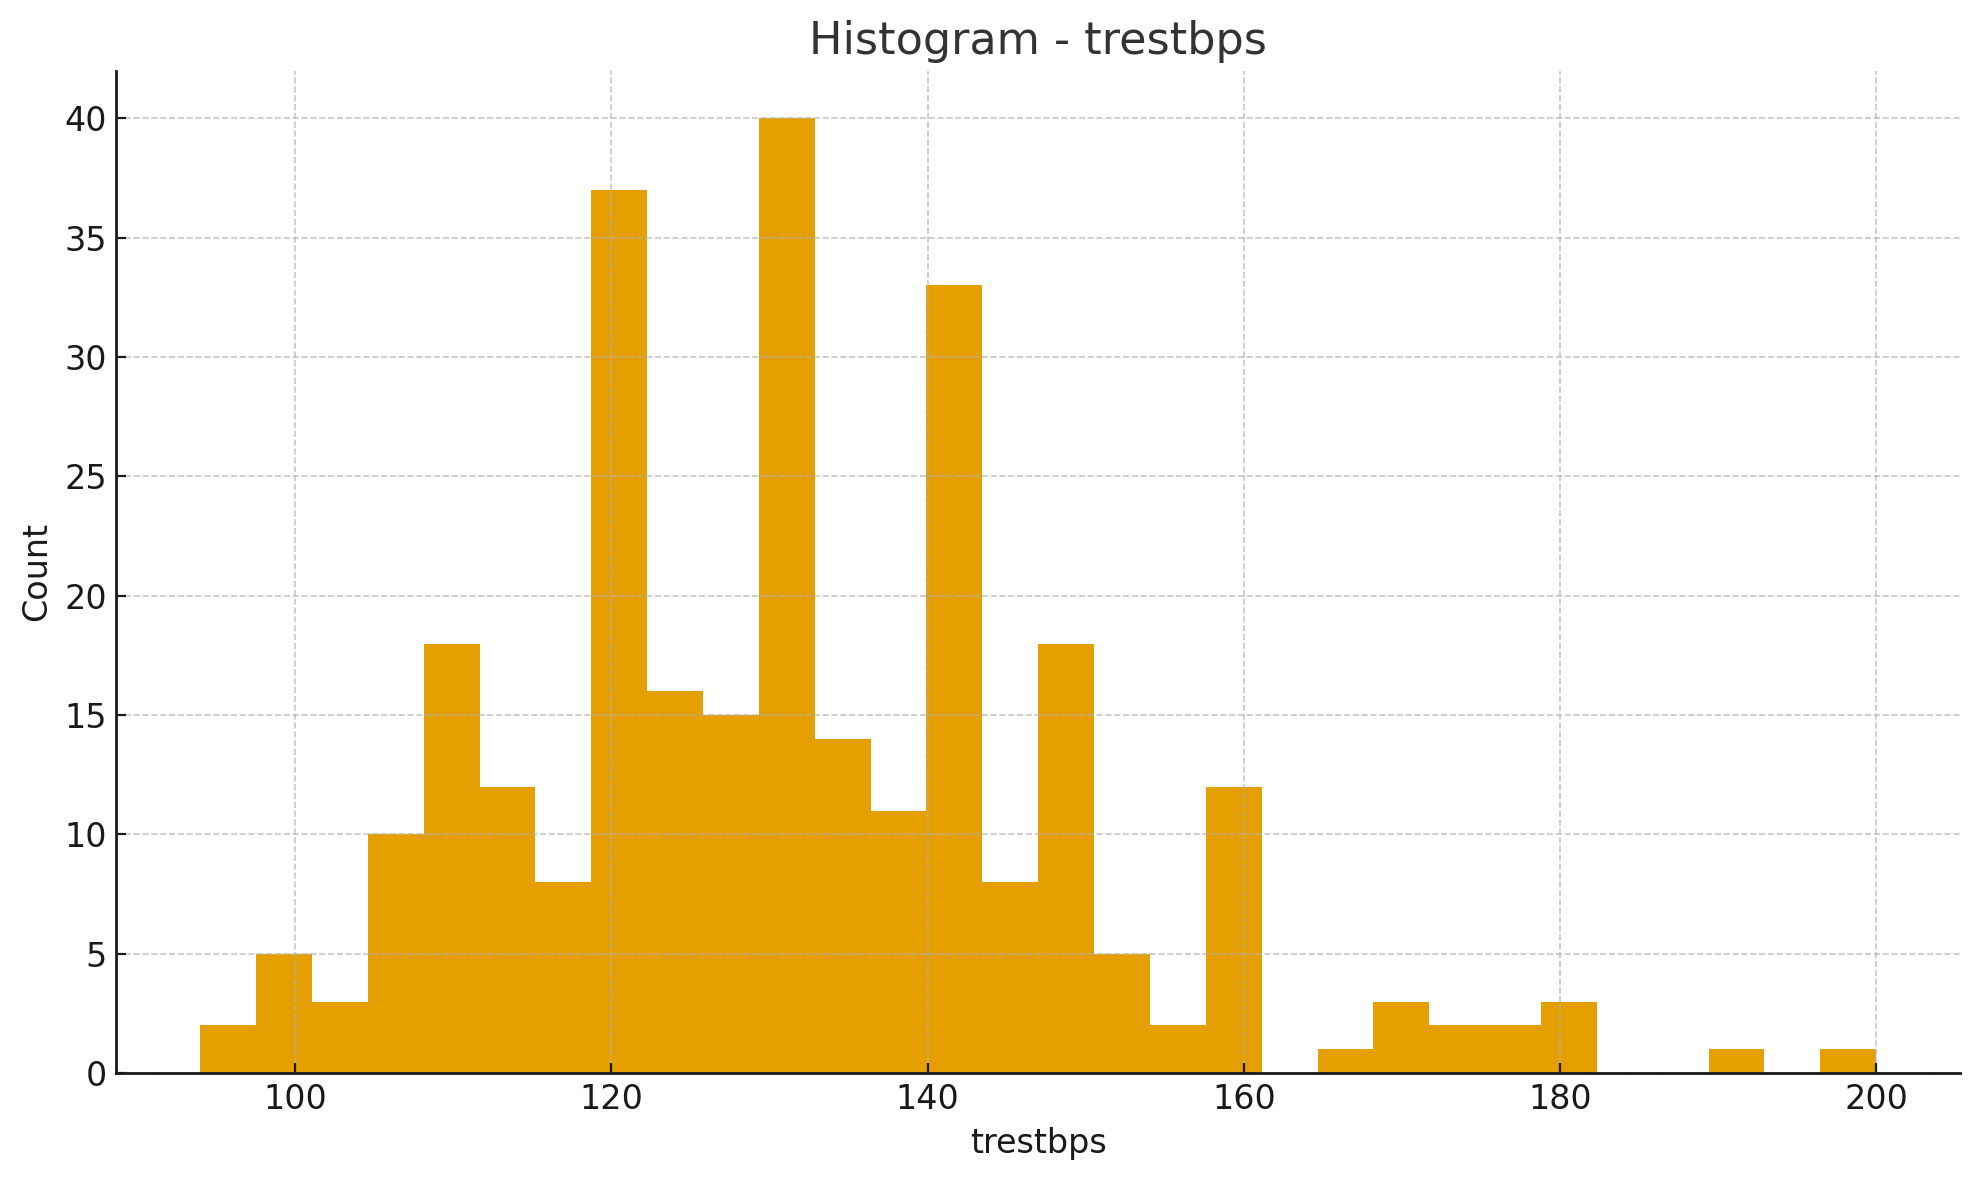

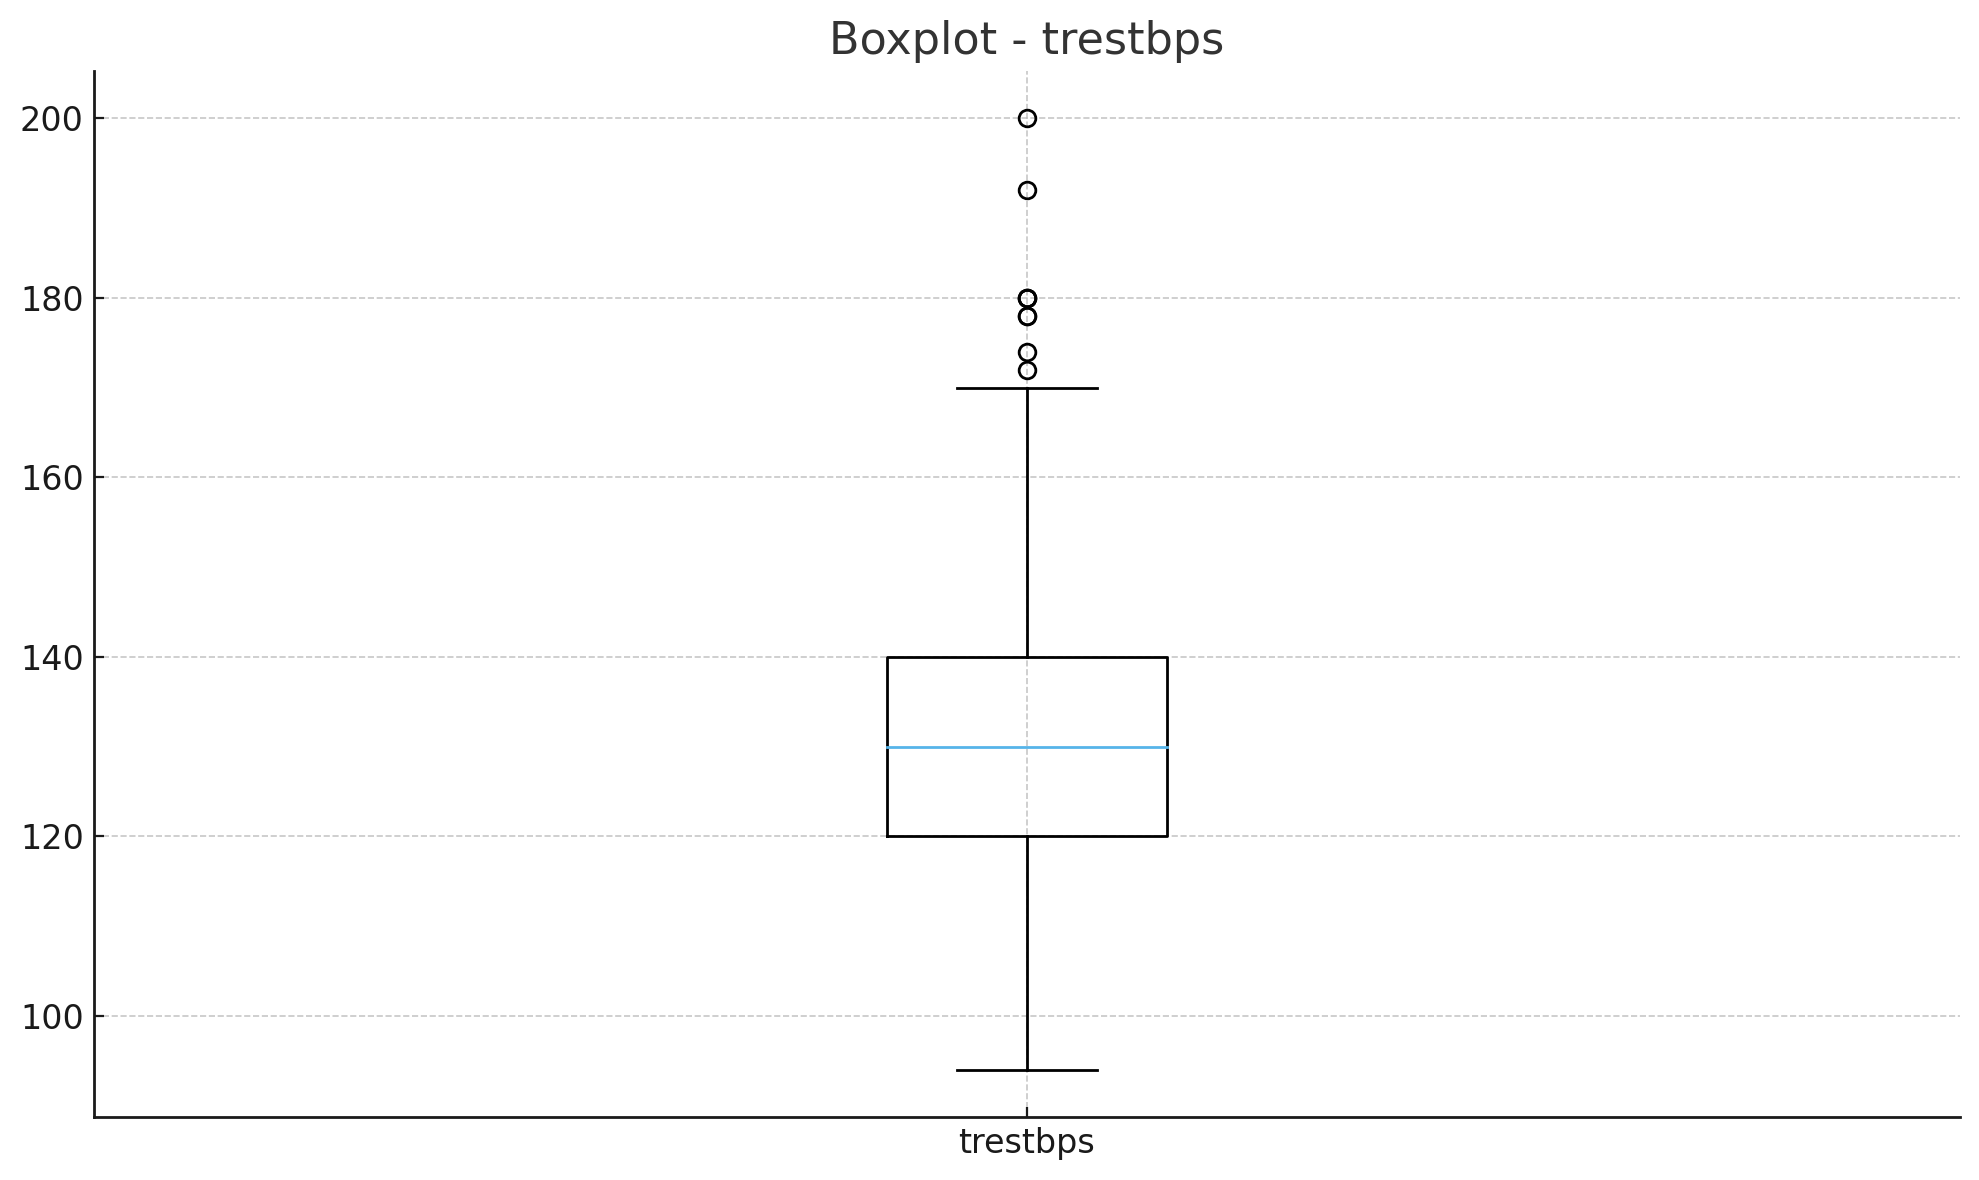

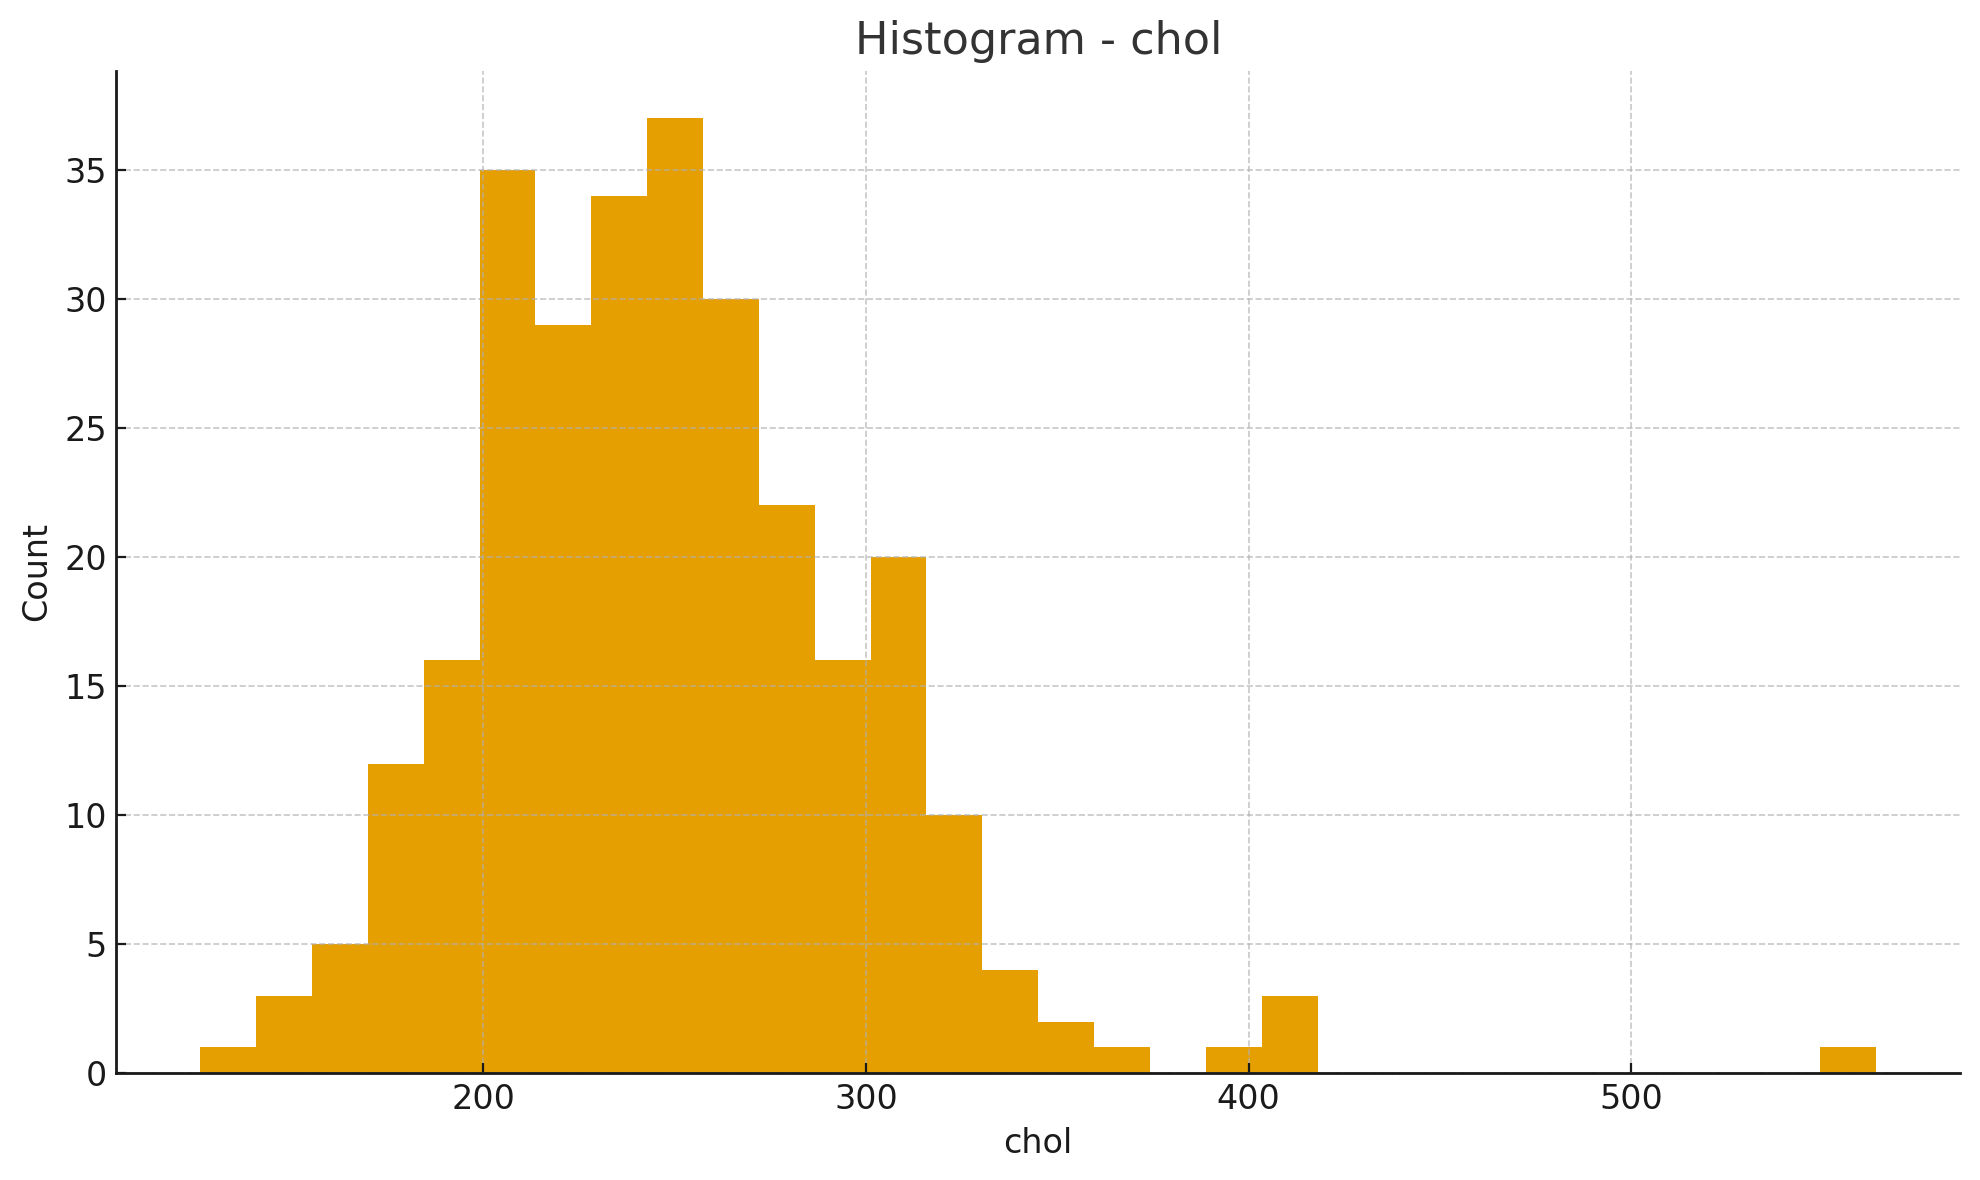

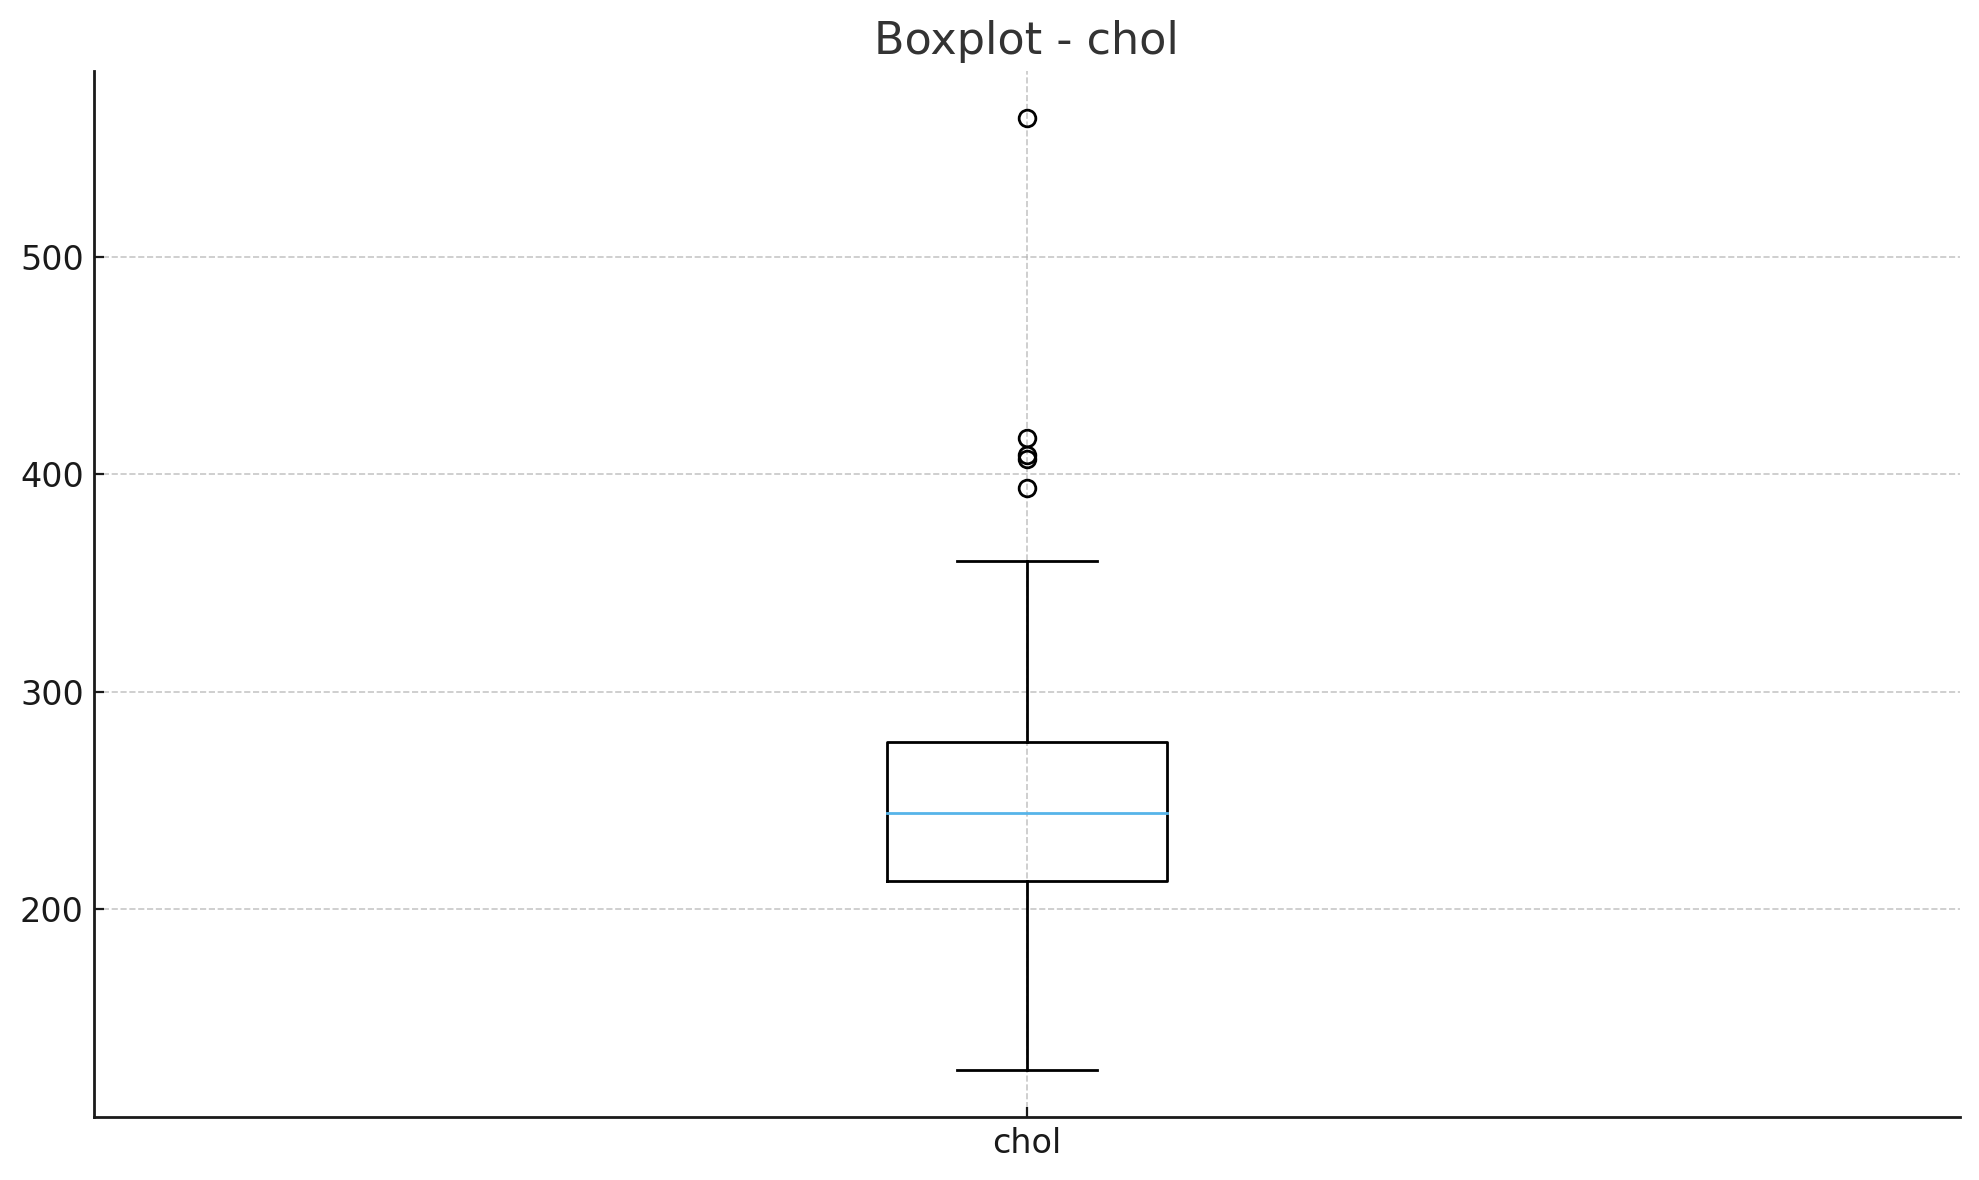

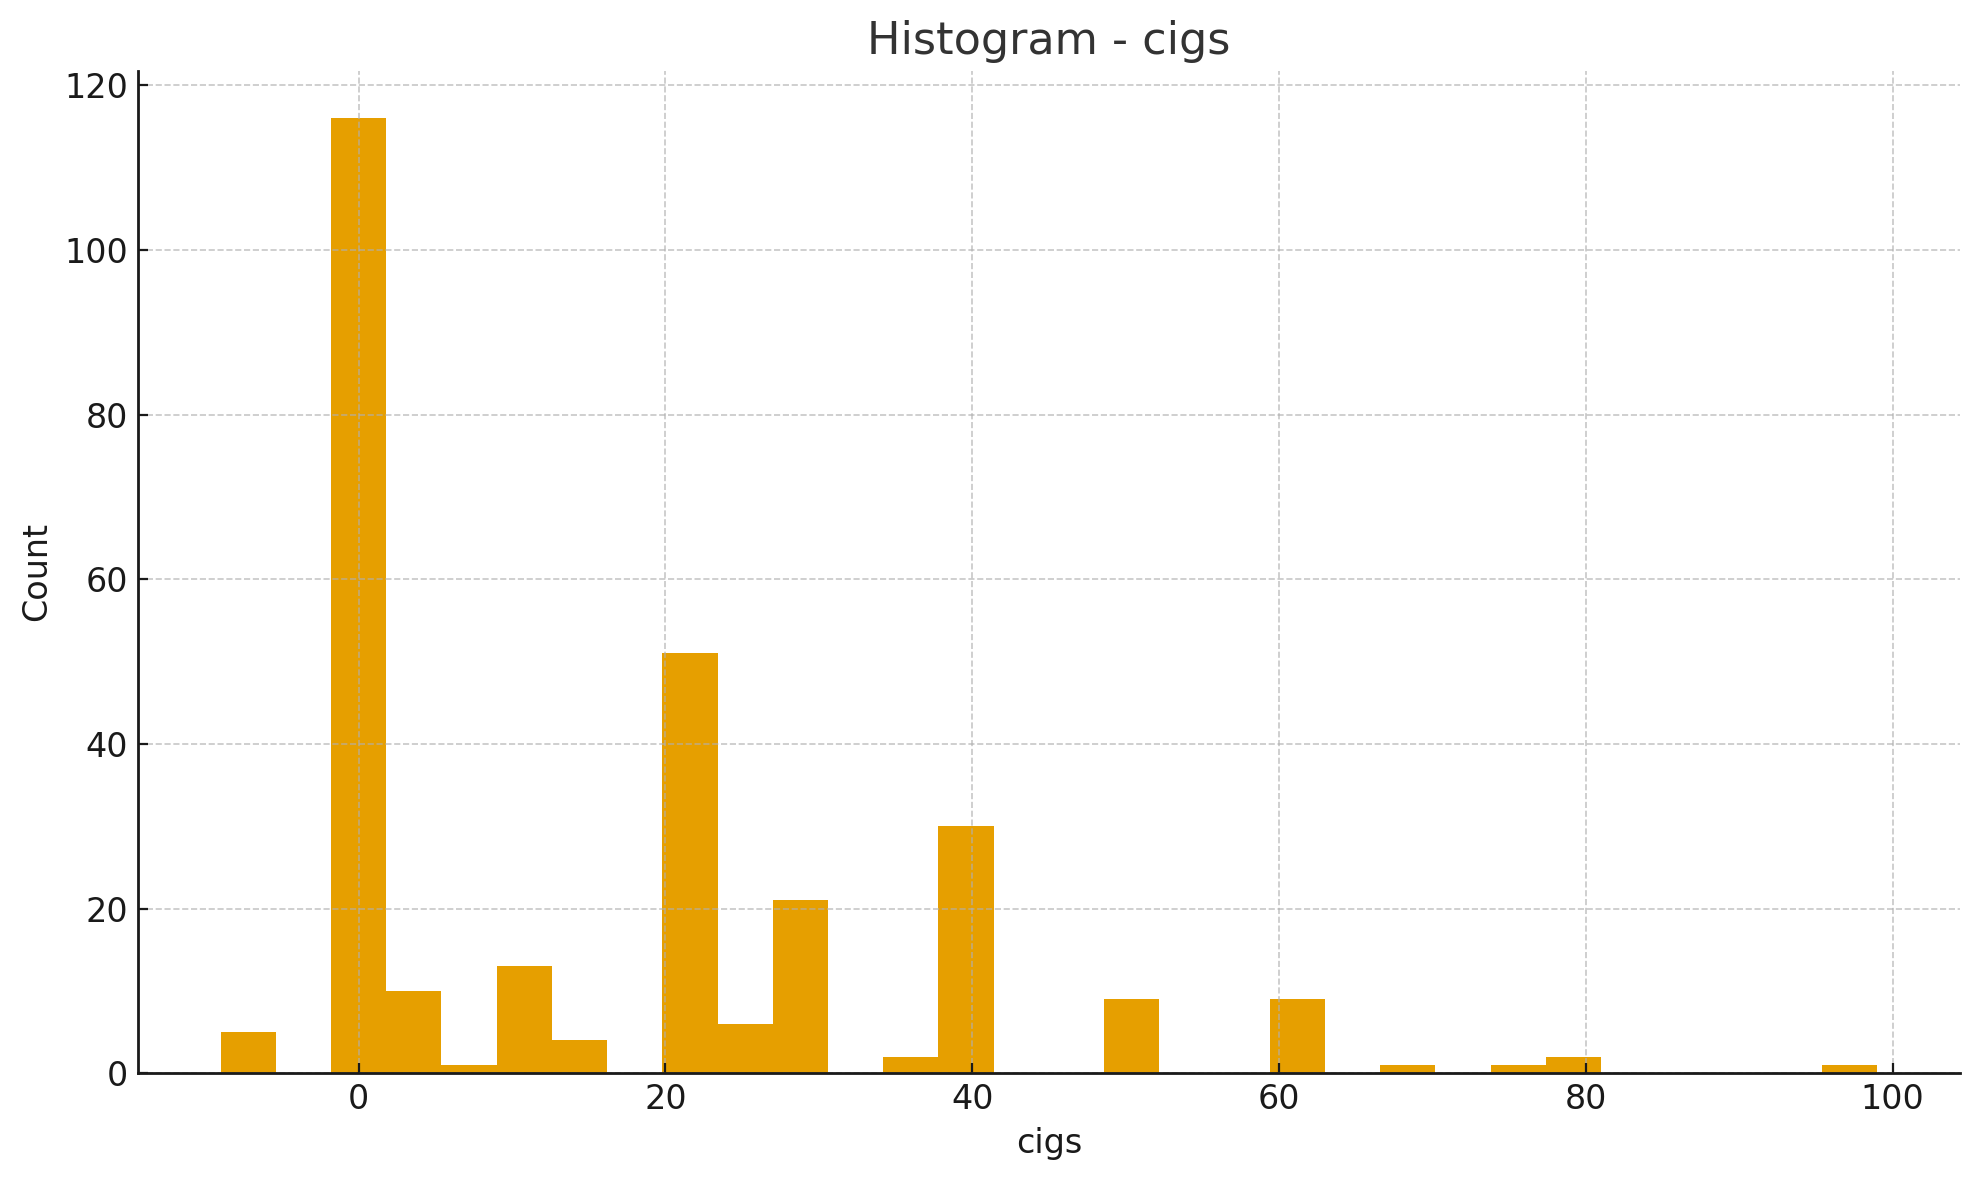

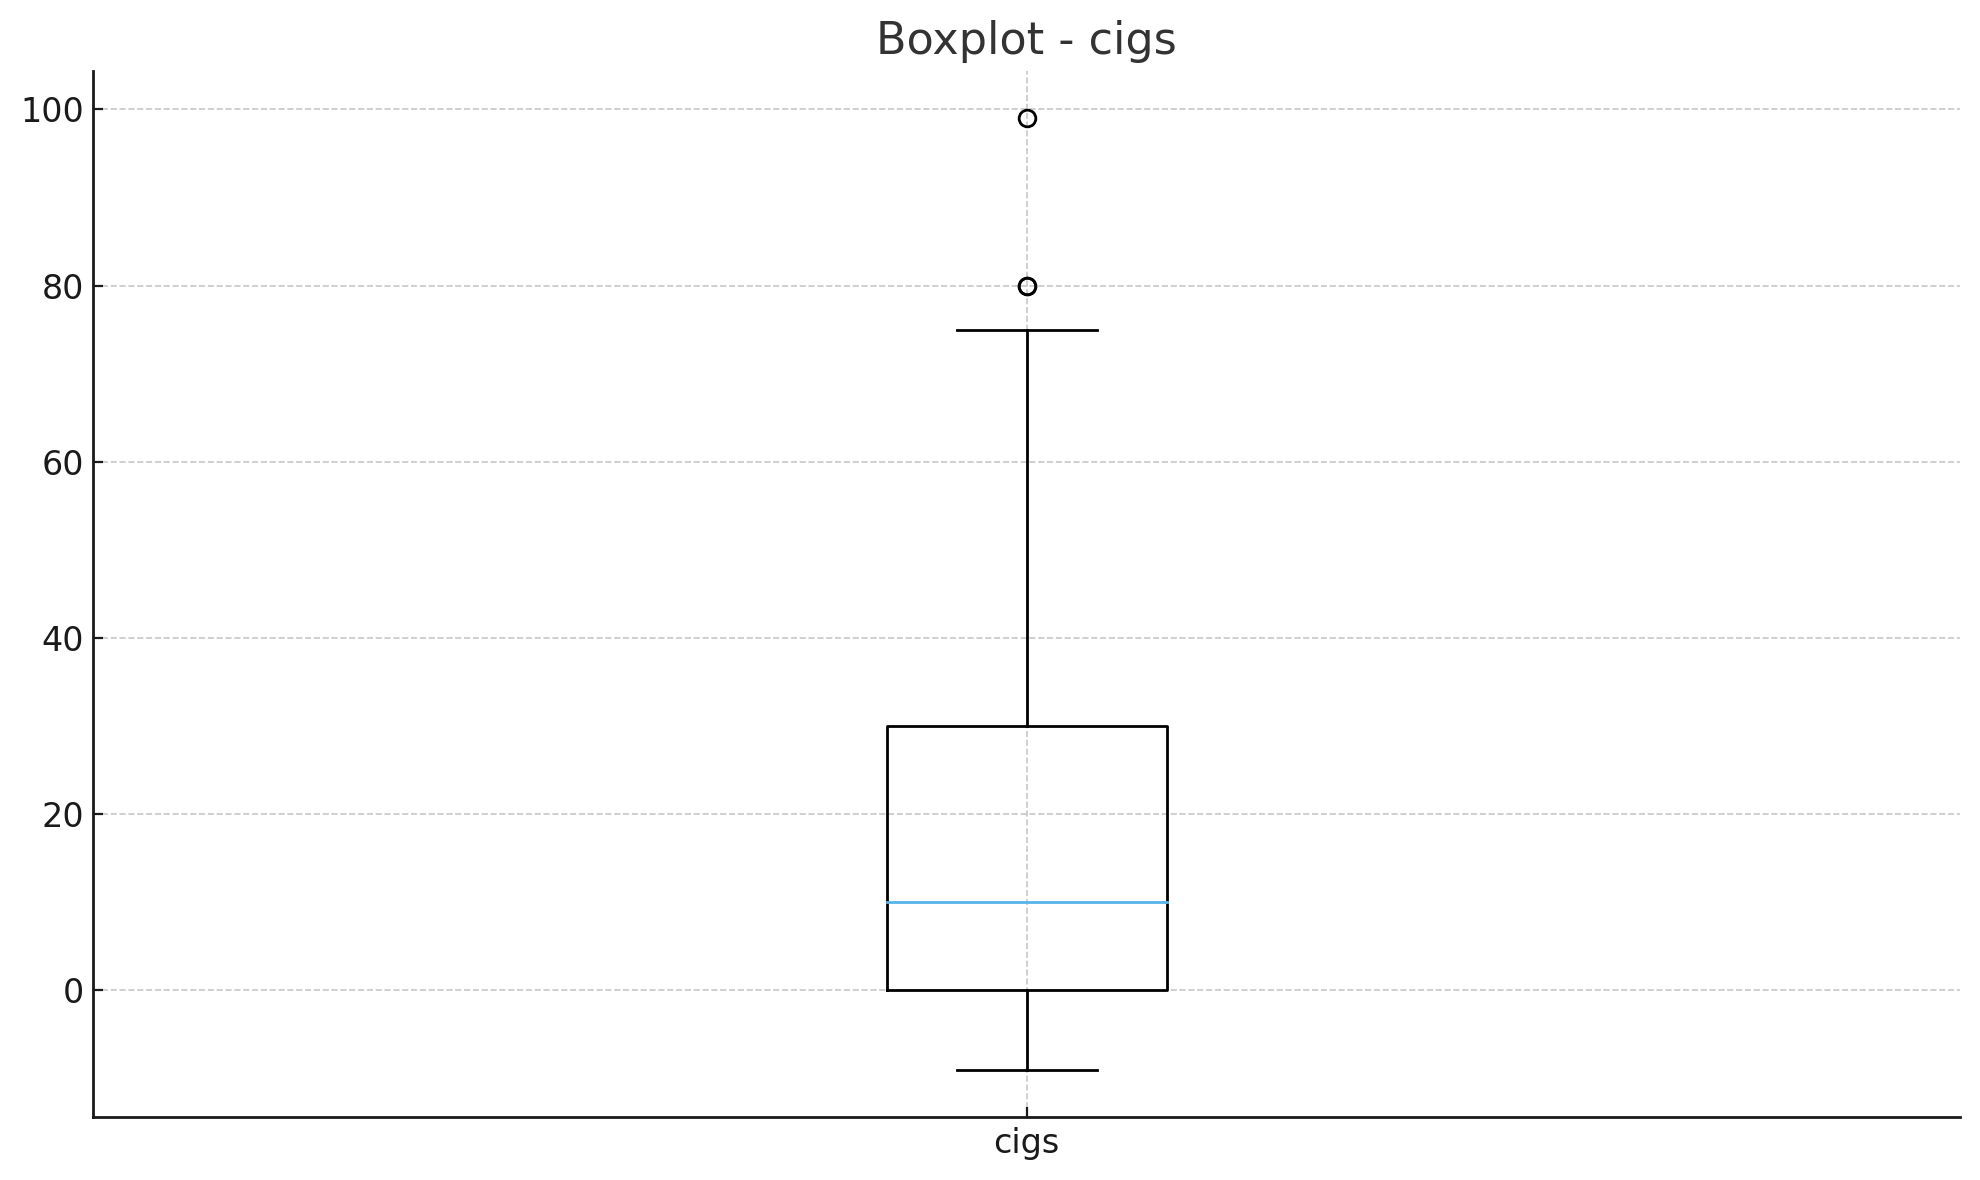

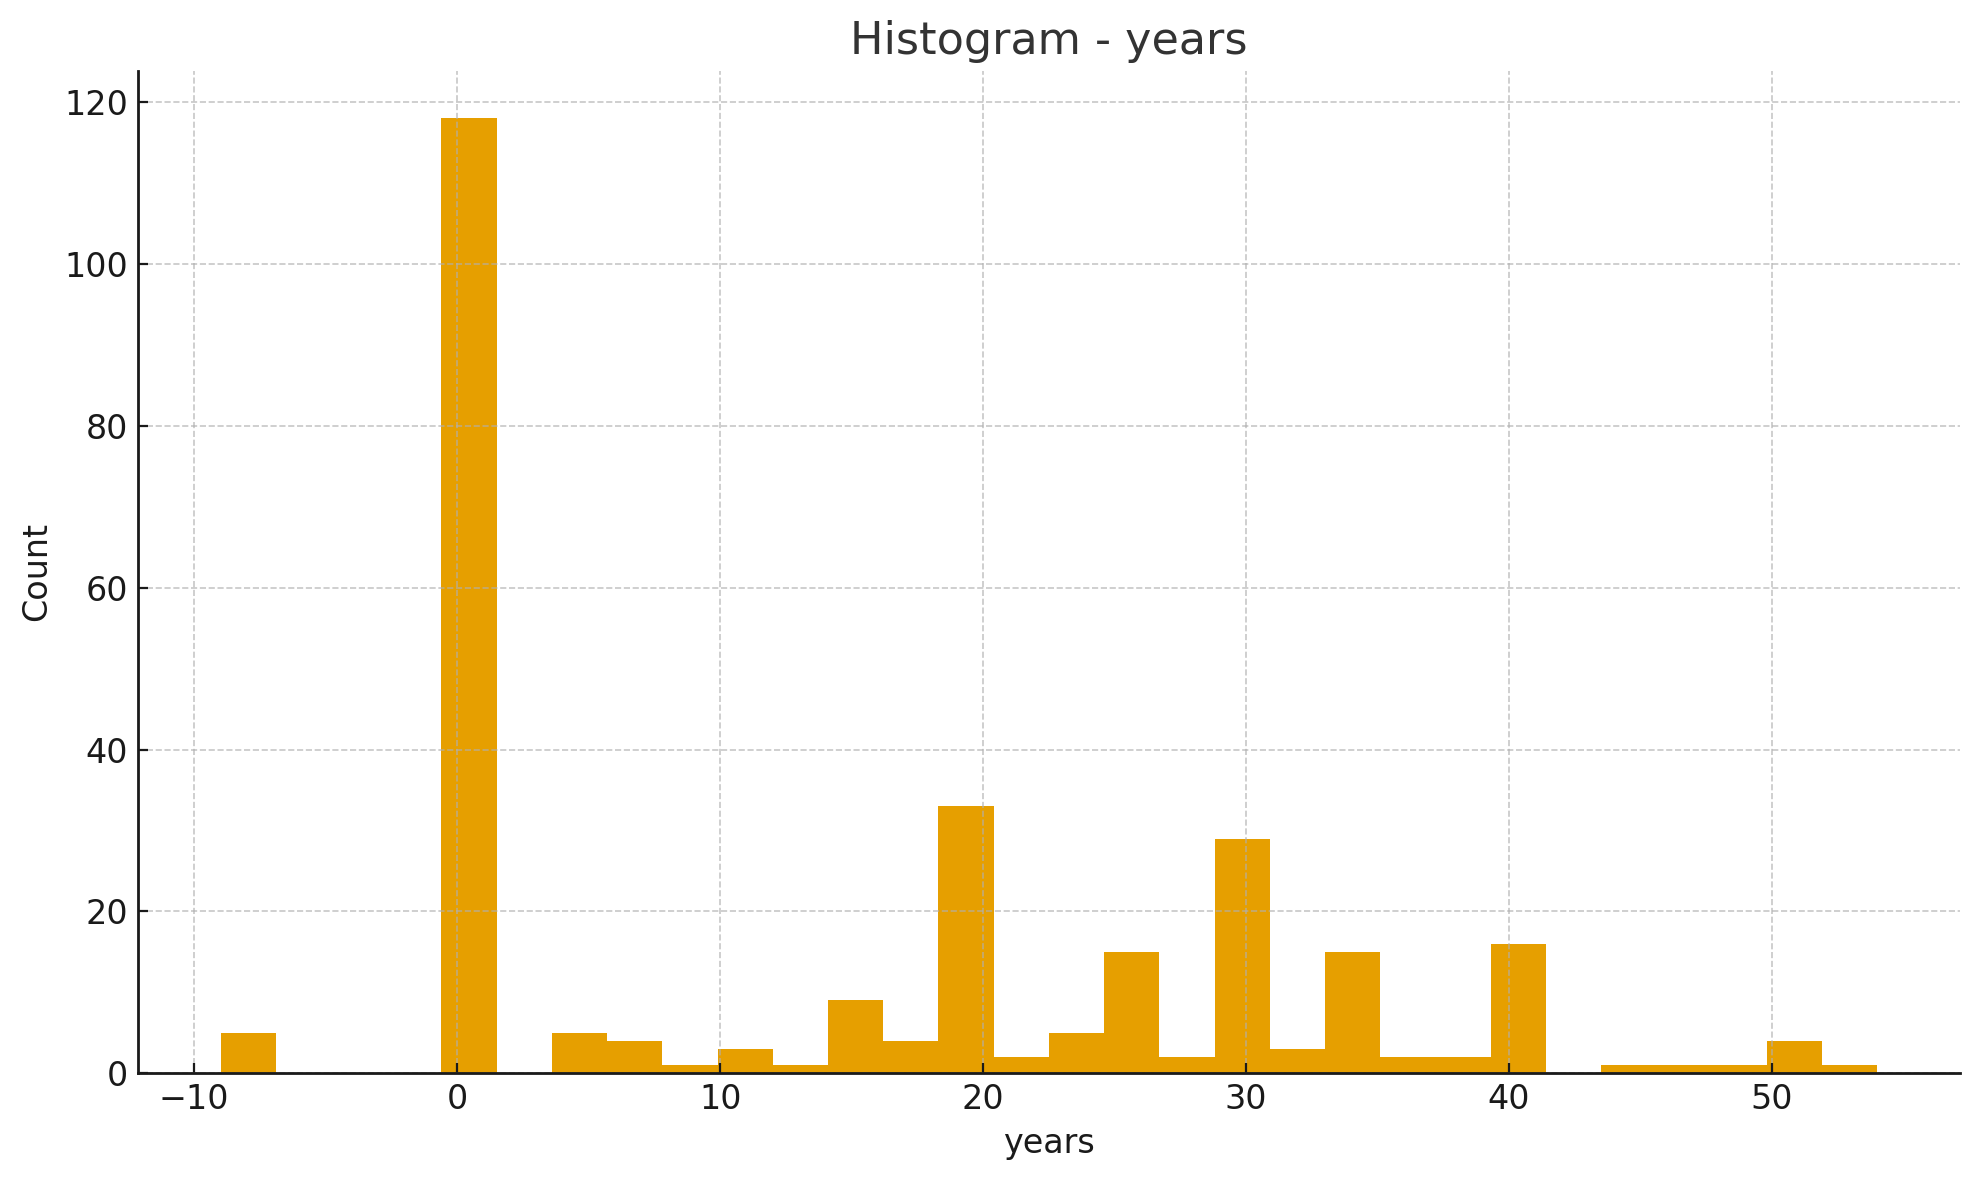

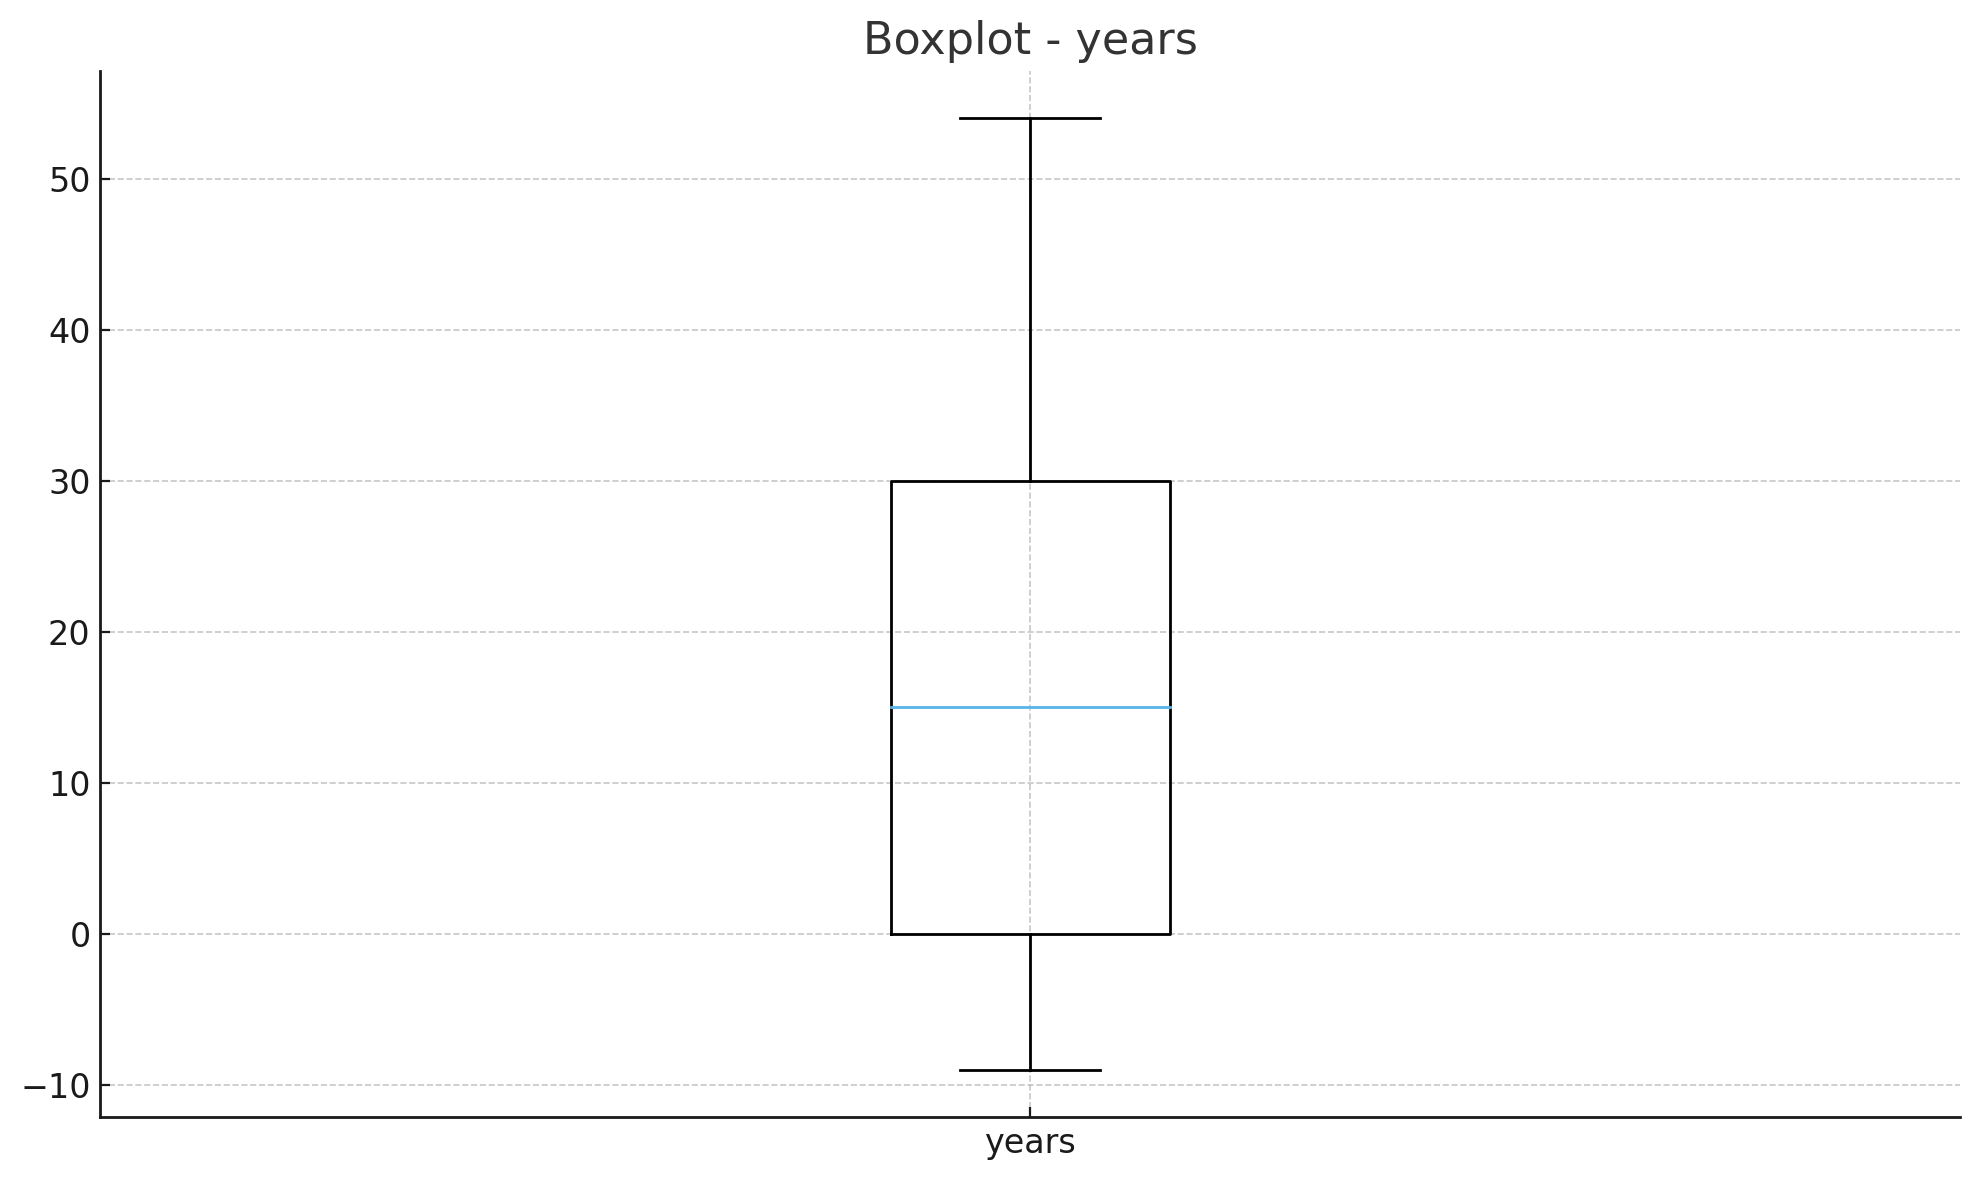

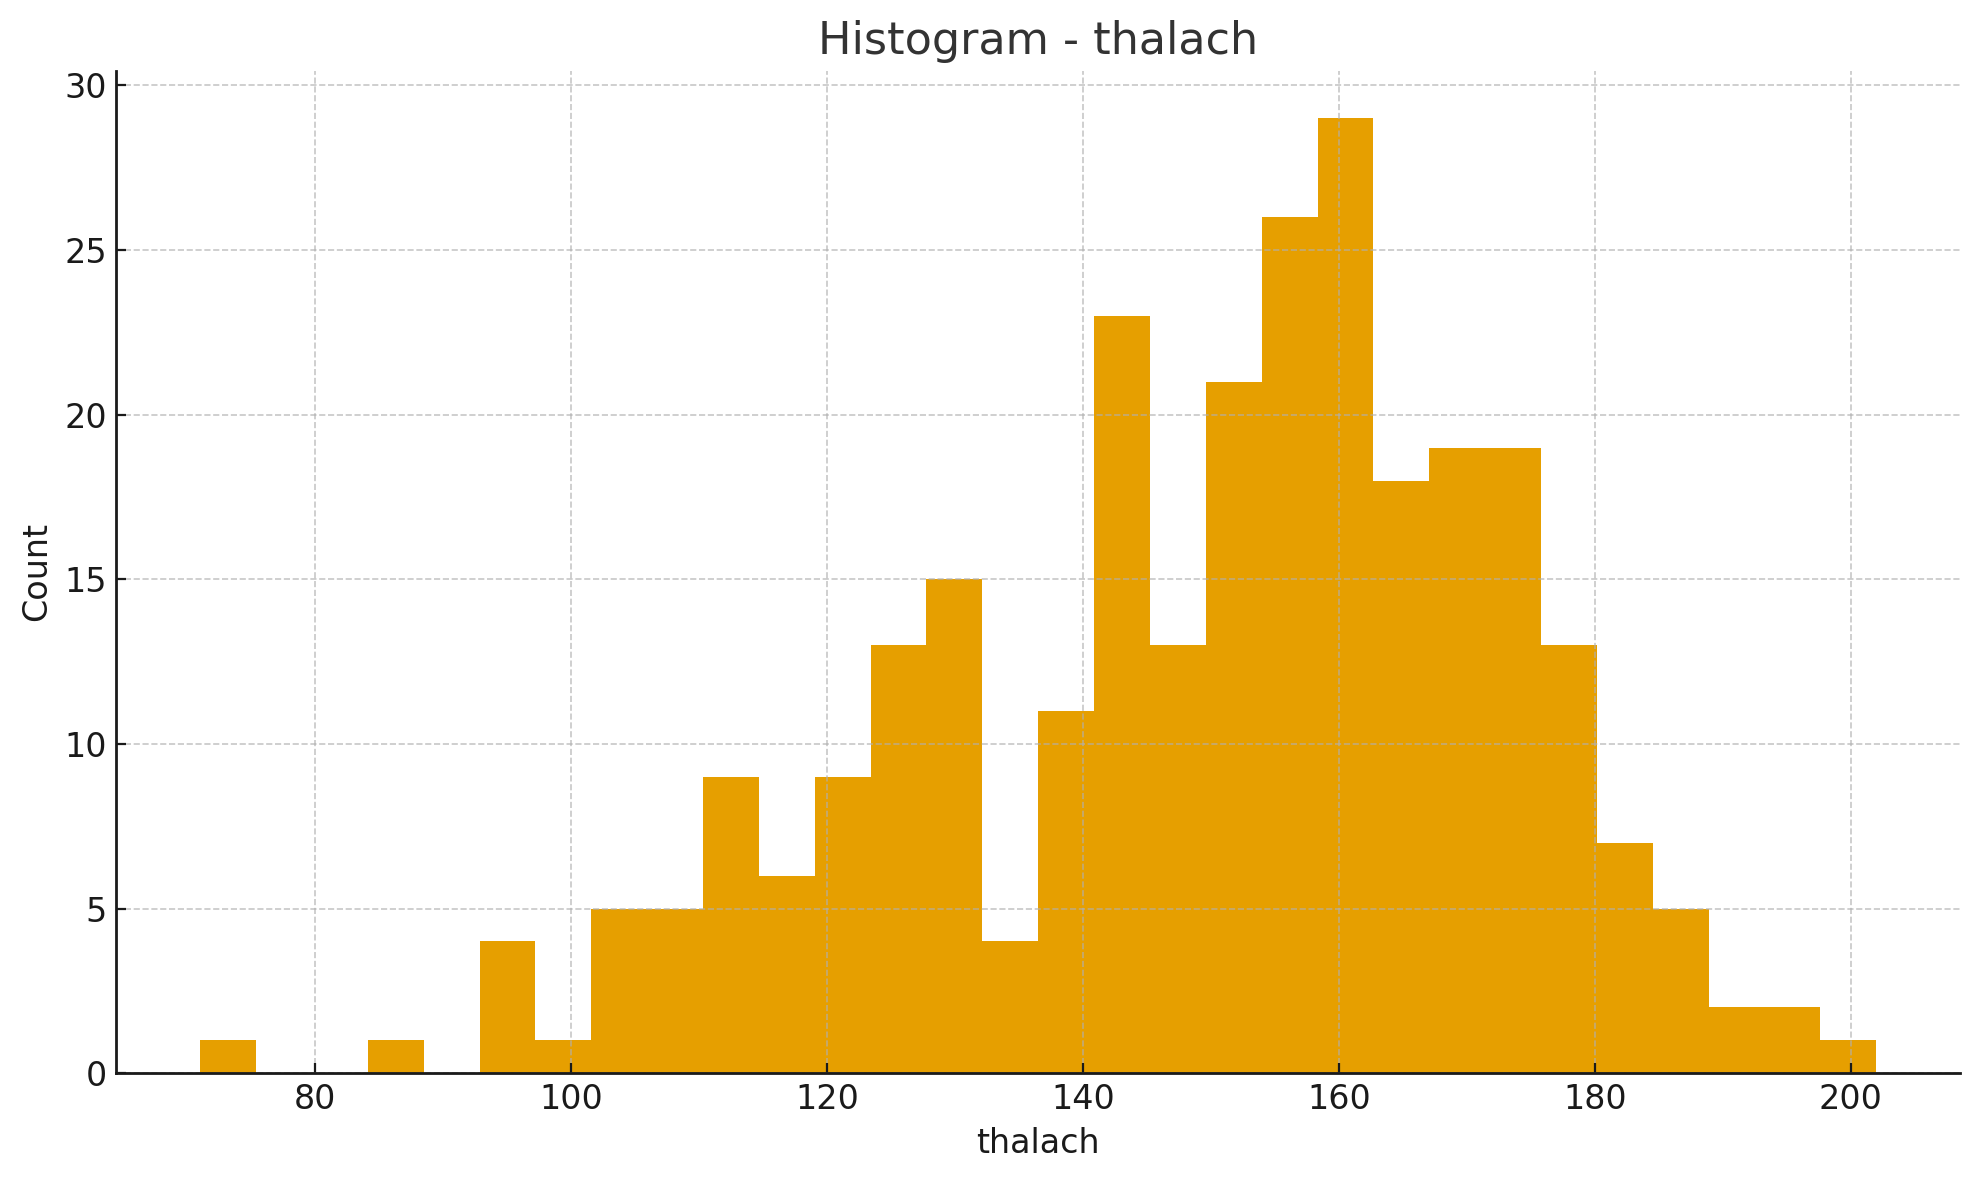

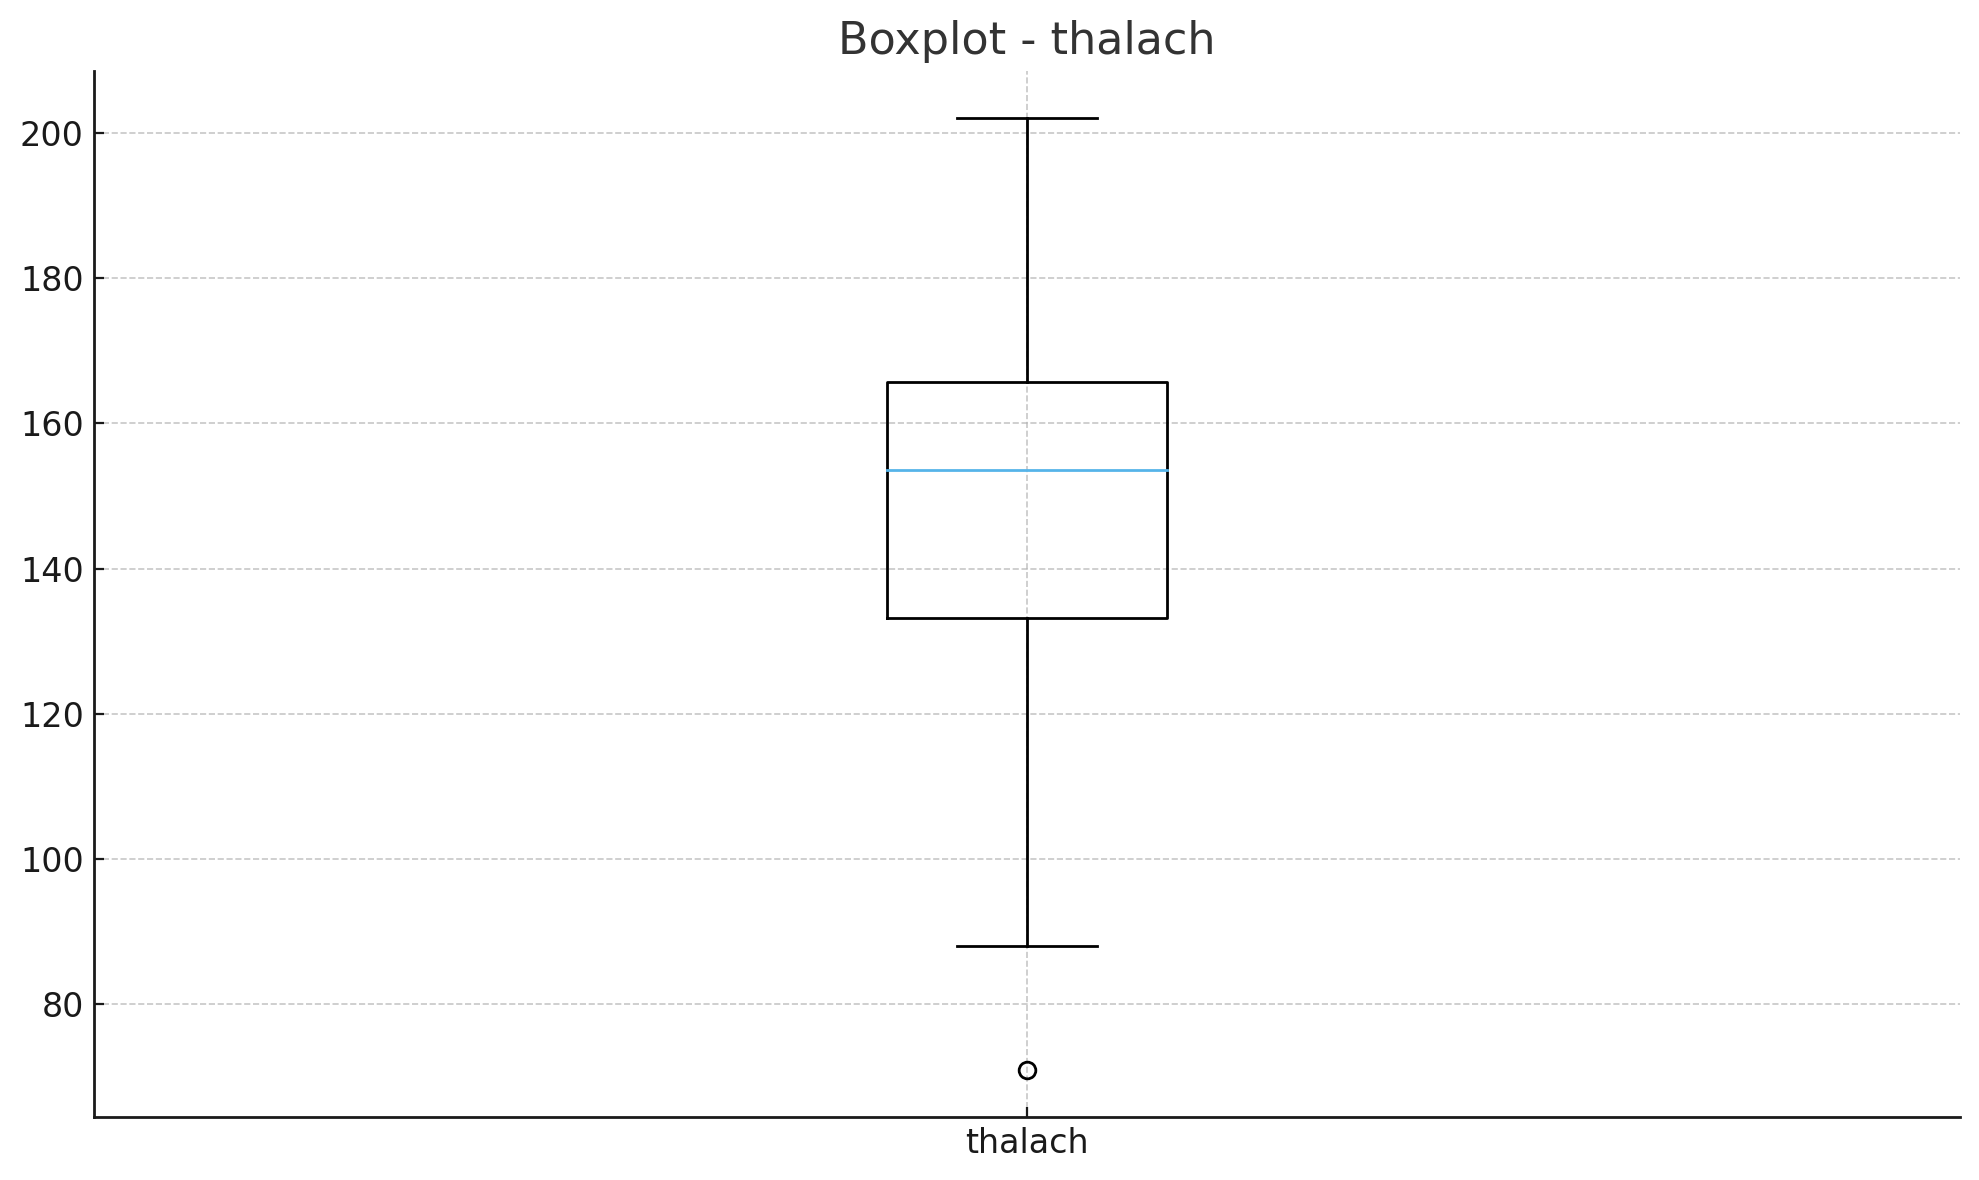

In [5]:

# Histograms and boxplots for numeric columns
for c in numeric_cols:
    plt.figure()
    df[c].hist(bins=30)
    plt.title(f"Histogram - {c}")
    plt.xlabel(c); plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    plt.figure()
    plt.boxplot(df[c].dropna(), vert=True, labels=[c])
    plt.title(f"Boxplot - {c}")
    plt.tight_layout()
    plt.show()


In [6]:

# Feature engineering: combine smoking info into pack_years (if columns present)
cols_present = set(df.columns)
if {'cigs','years'}.issubset(cols_present):
    df['pack_years'] = (df['cigs'].astype(float) * df['years'].astype(float)) / 20.0
    # We'll drop original cigs/years to avoid multicollinearity and because pack_years is more interpretable
    to_drop = ['cigs','years']
else:
    to_drop = []

# Additional rule: drop columns with >40% missing or near-zero variance
missing_pct = df.isna().mean()
high_missing = missing_pct[missing_pct > 0.40].index.tolist()

# Near-zero variance columns: single unique value (ignoring NaNs)
nunique = df.nunique(dropna=True)
near_const = nunique[nunique <= 1].index.tolist()

# Compute final drop list (excluding target)
target_col = 'num' if 'num' in df.columns else None
drop_candidates = [c for c in set(to_drop + high_missing + near_const) if c != target_col]

print("Drop candidates:", drop_candidates)
df = df.drop(columns=drop_candidates, errors='ignore')

# Keep track for the markdown justification
dropped_columns = drop_candidates
created_features = ['pack_years'] if 'pack_years' in df.columns else []
print("Dropped columns:", dropped_columns)
print("Created features:", created_features)


Drop candidates: ['cigs', 'years']
Dropped columns: ['cigs', 'years']
Created features: ['pack_years']


In [7]:

# Outlier handling: IQR capping for numeric columns
numeric_cols = [c for c in df.columns if df[c].dtype != 'O' and c not in ['num']]
bounds = {}
for c in numeric_cols:
    q1 = df[c].quantile(0.25)
    q3 = df[c].quantile(0.75)
    iqr = q3 - q1
    if pd.isna(iqr) or iqr == 0:
        continue
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    bounds[c] = (float(lower), float(upper))
    df[c] = df[c].clip(lower, upper)

print("Applied IQR capping to:", list(bounds.keys()))


Applied IQR capping to: ['age', 'sex', 'cp', 'trestbps', 'chol', 'famhist', 'restecg', 'thalach', 'exang', 'thal', 'slope', 'pack_years']


In [8]:

# Imputation: median for numeric, mode for categorical-like
categorical_like = [c for c in categorical_like if c in df.columns]
numeric_cols = [c for c in df.columns if df[c].dtype != 'O' and c not in []]

for c in numeric_cols:
    if df[c].isna().any():
        med = df[c].median()
        df[c] = df[c].fillna(med)

for c in categorical_like:
    if df[c].isna().any():
        mode = df[c].mode(dropna=True)
        fill_val = mode.iloc[0] if not mode.empty else 0
        df[c] = df[c].fillna(fill_val)

print("Remaining missing values per column:")
print(df.isna().sum())


Remaining missing values per column:
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
dm            0
famhist       0
restecg       0
thalach       0
exang         0
thal          0
slope         0
num           0
pack_years    0
dtype: int64


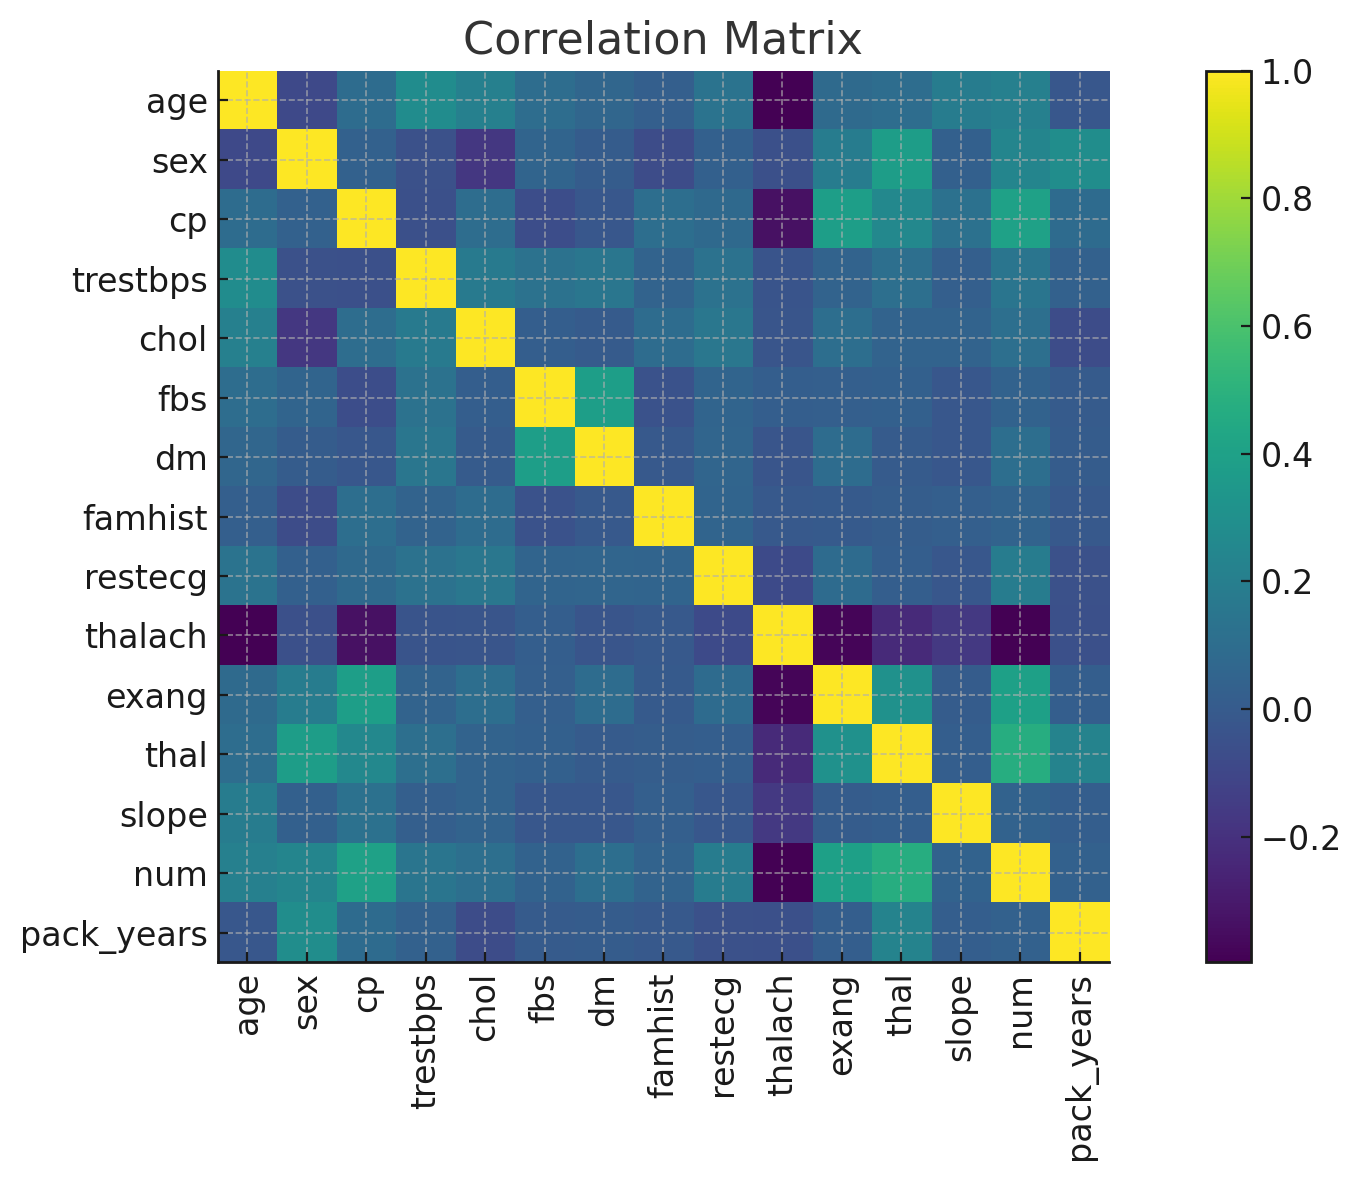

In [9]:

# Correlation matrix for numeric columns (including target if numeric)
num_for_corr = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
corr = df[num_for_corr].corr()

plt.figure()
plt.imshow(corr, interpolation='nearest')
plt.title("Correlation Matrix")
plt.colorbar()
plt.xticks(range(len(num_for_corr)), num_for_corr, rotation=90)
plt.yticks(range(len(num_for_corr)), num_for_corr)
plt.tight_layout()
plt.show()


In [10]:

# (Optional) One-hot encode categorical-like features for ML-ready dataset
from pandas.api.types import is_numeric_dtype

cat_cols = [c for c in df.columns if c in categorical_like]
num_cols = [c for c in df.columns if is_numeric_dtype(df[c]) and c not in cat_cols]

df_ml = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("Original shape:", df.shape, " ML shape:", df_ml.shape)
display(df.head())
display(df_ml.head())

# Save artifacts
CLEAN_PATH = "/mnt/data/heart_cleaned.csv"
ML_PATH = "/mnt/data/heart_prepared_ml.csv"
df.to_csv(CLEAN_PATH, index=False)
df_ml.to_csv(ML_PATH, index=False)

print("Saved cleaned dataset to:", CLEAN_PATH)
print("Saved ML-ready dataset to:", ML_PATH)


Original shape: (282, 15)  ML shape: (282, 24)


,age,sex,cp,trestbps,chol,fbs,dm,famhist,restecg,thalach,exang,thal,slope,num,pack_years
0,29,1,2.0,130,204,0,1,0,2,202.0,0,3,1,0,0.6
1,34,1,1.5,118,182,0,-9,0,2,174.0,0,3,1,0,6.0
2,34,0,2.0,118,210,0,-9,1,0,192.0,0,3,1,0,7.5
3,35,0,4.0,138,183,0,-9,1,0,182.0,0,3,1,0,0.0
4,35,1,4.0,120,198,0,-9,0,0,130.0,1,7,2,1,0.0


,age,trestbps,chol,thalach,pack_years,sex_1,cp_2.0,cp_3.0,cp_4.0,fbs_1,dm_1,famhist_1,restecg_1,restecg_2,exang_1,thal_3,thal_6,thal_7,slope_2,slope_3,num_1,num_2,num_3,num_4
0,29,130,204,202.0,0.6,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0
1,34,118,182,174.0,6.0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,34,118,210,192.0,7.5,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,35,138,183,182.0,0.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,35,120,198,130.0,0.0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0


Saved cleaned dataset to: /mnt/data/heart_cleaned.csv
Saved ML-ready dataset to: /mnt/data/heart_prepared_ml.csv


### Justification: Missing‑Value Imputation

I used **median imputation** for numeric features and **mode imputation** for categorical (coded) features such as `sex`, `cp`, `fbs`, `dm`, `famhist`, `restecg`, `exang`, `thal`, and `slope`. Median is robust to skew and outliers, while mode preserves the most frequent/valid category codes. After imputation, the dataset shows **0 remaining missing values**.

### Justification: Dropping Columns & Handling Outliers

**Dropped columns.** I engineered a clinically meaningful feature, **`pack_years` = (cigs × years) / 20**, which summarizes cumulative smoking exposure. To avoid redundancy and multicollinearity, I dropped the original `cigs` and `years` columns. I also checked for columns with >40% missingness or near‑zero variance; none met those criteria beyond the smoking pair, so no additional high‑missing/constant columns were removed.

**Outliers.** For continuous variables (e.g., `trestbps`, `chol`, `thalach`, `age`), I applied **IQR‑based capping** at [Q1 − 1.5×IQR, Q3 + 1.5×IQR]. This is a conservative approach that **preserves rank‑order information** and reduces the influence of extreme values on scale‑sensitive models (e.g., linear/logistic regression) without discarding any records. Variables with zero/undefined IQR were left unchanged.

### Use this markdown cell to justify how and why you imputed the data.

### Preparation Summary

1. **EDA:** Reviewed schema, missingness, distributions, and correlations.  
2. **Feature Engineering:** Created **`pack_years`** to summarize smoking exposure.  
3. **Column Pruning:** Dropped `cigs` and `years` (redundant with `pack_years`). No high‑missing or constant columns remained.  
4. **Outlier Treatment:** Applied IQR capping to continuous features to mitigate extreme values while retaining observations.  
5. **Imputation:** Median for numerics, mode for categoricals → no missing values remain.  
6. **ML‑Ready Export:** Saved cleaned dataset (`heart_cleaned.csv`) and one‑hot encoded ML dataset (`heart_prepared_ml.csv`) for modeling.

> Next steps (outside the scope here): split train/test, scale continuous features if needed, and try baseline models (logistic regression, tree‑based, etc.).